<div style="display: table; width: 100%;">
  <div style="display: table-cell; text-align: center; vertical-align: middle; width: 70%;">
    <h1>Herramientas para Data Science</h1>
  </div>
  <div style="display: table-cell; text-align: center; vertical-align: middle; width: 30%;">
    <img src="https://github.com/UIDE-Tareas/6-Herramientas-Data-Science-Tarea1/blob/main/Assets/UideLogo.png?raw=true" alt="logo UIDE" style="width:50%;">
  </div>
</div>
<hr />

### 🟦 Componente Práctico 1  
🟡 Grupo: 3      
🟡 Semana: 1      
🟡 Docente:  Ing. Iván García S., PhD. (idgs78@hotmail.com)     

### 🟦 Realizado por:   
Estudiantes

💻 Evelin Rosero Ordoñez   

💻 Marjorie Muso Tandalla

💻 José Espinoza Bone

### 🟦 Objetivo y alcance del trabajo 
- Esta práctica tiene el objetivo de realizar un preprocesamiento de datos y un Análisis 
exploratorio de datos (estadísticas y visualización) de las variables más relevantes 
que considere para el propósito de predicción de cáncer de mama. Al finalizar la 
práctica, los maestrantes podrán manipular adecuadamente un dataset de datos 
estructurados (alfanuméricos). [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

- Esta práctica tiene el objetivo de realizar la predicción del tipo de cáncer de mama 
(maligno=1, benigno=0) utilizando los algoritmos de clasificación revisados de 
regresión logística y K-NN, así como realizar la evaluación del rendimiento de los 
algoritmos usando las métricas y gráficas respectivas. Al finalizar la práctica, los 
maestrantes podrán entender y manipular adecuadamente los diferentes 
parámetros e hiperparámetros de los algoritmos estudiados.

- Esta práctica tiene el objetivo de realizar la predicción del tipo de cáncer de mama 
(maligno=1, benigno=0) utilizando los algoritmos de clasificación revisados de árbol 
de decisión, bosque aleatorio y redes neuronales artificiales, así como realizar la 
evaluación del rendimiento de los algoritmos usando las métricas y gráficas 
respectivas. Al finalizar la práctica, los maestrantes podrán entender y manipular 
adecuadamente los diferentes parámetros e hiperparámetros de los algoritmos 
estudiados. 

### 🟦 [Código fuente original](https://github.com/UIDE-Tareas/6-Herramientas-Data-Science-Tarea1.git)
Con [git](https://git-scm.com/) instalado. En Windows, Linux o MacOS ejecutar el comando.

```
git clone "https://github.com/UIDE-Tareas/6-Herramientas-Data-Science-Tarea1.git"
```

# 0️⃣ Preparar entorno

Funciones base para utilizar si son requeridas en el presente notebook. Adicional hay funciones utilitarias para utilizar con pandas.DataFrame y finalmente las funciones para cumplir con los objetivos del presente trabajo práctico.

In [11]:
# UTILIDADES PARA GESTIÓN DE DEPENDENCIAS E INFORMACIÓN DEL ENTORNO

import sys
import subprocess
import os
from pathlib import Path
from enum import Enum
import zipfile
from typing import Optional
from typing import Iterable
from dataclasses import dataclass
from typing import cast
from typing import Tuple
from enum import Enum
from types import SimpleNamespace
from typing import Any
from typing import Protocol
from typing import Literal
from typing import Sequence

# Libs a instalar
LIBS = [
    "numpy",
    "pandas",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    "requests",
    "wcwidth",
    "tensorflow"
]

class ConsoleColor(Enum):
    RED = "\033[91m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    BLUE = "\033[94m"
    MAGENTA = "\033[95m"
    CYAN = "\033[96m"
    WHITE = "\033[97m"
    RESET = "\033[0m"


def PrintColor(message: str, color: ConsoleColor) -> str:
    RESET = ConsoleColor.RESET.value
    return f"{color.value}{message}{RESET}"


def ShowMessage(
    message: str, title: str, icon: str, color: ConsoleColor, end: str = "\n"
):
    colored_title = PrintColor(icon + f"  " + title.upper() + ":", color)
    print(f"{colored_title} {message}", end=end)


def ShowInfoMessage(
    message: str, title: str = "Info", icon: str = "ℹ️", end: str = "\n"
):
    ShowMessage(message, title, icon, ConsoleColor.CYAN, end)


def ShowSuccessMessage(
    message: str, title: str = "Success", icon: str = "✅", end: str = "\n"
):
    ShowMessage(message, title, icon, ConsoleColor.GREEN, end)


def ShowErrorMessage(
    message: str, title: str = "Error", icon: str = "❌", end: str = "\n"
):
    ShowMessage(message, title, icon, ConsoleColor.RED, end)


def ShowWarningMessage(
    message: str, title: str = "Warning", icon: str = "⚠️", end: str = "\n"
):
    ShowMessage(message, title, icon, ConsoleColor.YELLOW, end)


# Funcion para ejecutar comandos
def RunCommand(
    commandList: list[str], printCommand: bool = True, printError: bool = True
) -> subprocess.CompletedProcess[str]:
    print("⏳", " ".join(commandList))

    if printCommand:
        proc = subprocess.Popen(
            commandList,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True,
            bufsize=1,
            universal_newlines=True,
        )

        out_lines: list[str] = []
        assert proc.stdout is not None
        for line in proc.stdout:
            print(line, end="")
            out_lines.append(line)

        proc.wait()
        err_text = ""
        if proc.stderr is not None:
            err_text = proc.stderr.read() or ""

        if proc.returncode != 0 and printError and err_text:
            ShowErrorMessage(err_text, "", end="")
            # print(err_text, end="")

        return subprocess.CompletedProcess(
            args=commandList,
            returncode=proc.returncode,
            stdout="".join(out_lines),
            stderr=err_text,
        )

    else:
        result = subprocess.run(
            commandList, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True
        )
        if result.returncode != 0 and printError and result.stderr:
            ShowErrorMessage(result.stderr, "", end="")
            # print(result.stderr, end="")
        return result


# Función para instalar las dependencias
def InstallDeps(libs: Optional[list[str]] = None):
    print("ℹ️ Installing deps.")
    printCommand = False
    printError = True
    RunCommand(
        [sys.executable, "-m", "pip", "install", "--upgrade", "pip"],
        printCommand=printCommand,
        printError=printError,
    )
    if libs is None or libs.count == 0:
        print("No hay elementos a instalar.")
    else:
        RunCommand(
            [sys.executable, "-m", "pip", "install", *libs],
            printCommand=printCommand,
            printError=printError,
        )
        print("Deps installed.")
    print()


# Función para mostrar info el ambiente de ejecución
def ShowEnvironmentInfo():
    print("ℹ️  Environment Info:")
    print("Python Version:", sys.version)
    print("Platform:", sys.platform)
    print("Executable Path:", sys.executable)
    print("Current Working Directory:", os.getcwd())
    print("VIRTUAL_ENV:", os.environ.get("VIRTUAL_ENV"))
    print("sys.prefix:", sys.prefix)
    print("sys.base_prefix:", sys.base_prefix)
    print()


InstallDeps(LIBS)
ShowEnvironmentInfo()
import requests


@dataclass(frozen=True)
class BoxStyle:
    TL: str
    TR: str
    BL: str
    BR: str
    H: str
    V: str

class TitleBoxLineStyle(Enum):
    SIMPLE = BoxStyle("┌", "┐", "└", "┘", "─", "│")
    DOUBLE = BoxStyle("╔", "╗", "╚", "╝", "═", "║")
    ROUNDED = BoxStyle("╭", "╮", "╰", "╯", "─", "│")
    HEAVY = BoxStyle("┏", "┓", "┗", "┛", "━", "┃")
    ASCII = BoxStyle("+", "+", "+", "+", "-", "|")
    DOUBLE_BOLD = BoxStyle("╔", "╗", "╚", "╝", "╬", "║")
    BLOCK = BoxStyle("█", "█", "█", "█", "█", "█")
    HEAVY_CROSS = BoxStyle("╒", "╕", "╘", "╛", "╪", "┃")
    METAL = BoxStyle("╞", "╡", "╘", "╛", "═", "║")


# Función para mostrar un título con recuadro
def ShowTitleBox(
    text: str,
    max_len: int = 100,
    boxLineStyle: TitleBoxLineStyle = TitleBoxLineStyle.SIMPLE,
    color: ConsoleColor = ConsoleColor.CYAN,
):
    try:

        def vislen(s: str) -> int:
            from wcwidth import wcswidth as _w

            n = _w(s)
            return n if n >= 0 else len(s)

    except Exception:

        def vislen(s: str) -> int:
            return len(s)

    pad = 1
    tlen = vislen(text)
    inner = max(max_len, tlen)
    left = (inner - tlen) // 2
    right = inner - tlen - left

    top = f"{boxLineStyle.value.TL}{boxLineStyle.value.H * (inner + 2 * pad)}{boxLineStyle.value.TR}"
    mid = f"{boxLineStyle.value.V}{' ' * pad}{' ' * left}{text}{' ' * right}{' ' * pad}{boxLineStyle.value.V}"
    bot = f"{boxLineStyle.value.BL}{boxLineStyle.value.H * (inner + 2 * pad)}{boxLineStyle.value.BR}"
    print(PrintColor("\n".join([top, mid, bot]), color))


# Función para descargar un archivo
def DownloadFile(uri: str, filename: str, overwrite: bool = False, timeout: int = 20, printInfo: bool = True):
    dest = Path(filename).resolve()
    if dest.exists() and dest.is_file() and dest.stat().st_size > 0 and not overwrite:
        if printInfo:
            print(
                f'✅ Ya existe: "{dest}". No se descarga (use overwrite=True para forzar).'
            )
        return
    if dest.parent and not dest.parent.exists():
        dest.parent.mkdir(parents=True, exist_ok=True)
    if printInfo:
        print(f'ℹ️ Descargando "{uri}" → "{dest}"')
    try:
        with requests.get(uri, stream=True, timeout=timeout) as resp:
            resp.raise_for_status()
            tmp = dest.with_suffix(dest.suffix + ".part")
            with open(tmp, "wb") as f:
                for chunk in resp.iter_content(chunk_size=1024 * 64):
                    if chunk:  # filtra keep-alive chunks
                        f.write(chunk)
            tmp.replace(dest)
        if printInfo: 
            print(f'✅ Archivo "{dest}" descargado exitosamente.')
    except requests.exceptions.RequestException as e:
        print(f"❌ Error al descargar: {e}")


# Función para descomprimir un archivo zip
def UnzipFile(filename: str, outputDir: str):
    print(f'ℹ️ Descomprimiendo "{filename}" en "{outputDir}"')
    try:
        with zipfile.ZipFile(filename, "r") as zip_ref:
            zip_ref.extractall(outputDir)
        print(f"Descomprimido en: {os.path.abspath(outputDir)}")
    except Exception as e:
        print(f"Error: {e}")


ℹ️ Installing deps.
⏳ c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip
⏳ c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install numpy pandas matplotlib seaborn scikit-learn requests wcwidth tensorflow
Deps installed.

ℹ️  Environment Info:
Python Version: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]
Platform: win32
Executable Path: c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe
Current Working Directory: c:\Users\Megam\OneDrive\Escritorio\6-Herramientas-Data-Science-Tarea1
VIRTUAL_ENV: None
sys.prefix: c:\Users\Megam\AppData\Local\Programs\Python\Python313
sys.base_prefix: c:\Users\Megam\AppData\Local\Programs\Python\Python313



In [12]:
# UTILIDADES PARA ANÁLISIS Y MANIPULACIÓN DE DATAFRAMES

# Importar libraries
import pandas as pd
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib.figure import Figure
from matplotlib.axes import Axes

from pandas import DataFrame
from pandas import Series
from sklearn.utils import Bunch
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

warnings.filterwarnings("ignore")

# Configurar opciones de Pandas
pd.set_option("display.float_format", "{:.2f}".format)
pandas.set_option("display.max_rows", None)
pandas.set_option("display.max_columns", None)


# Función para mostrar la información del DataFrame.
def ShowDfInfo(df: pandas.DataFrame, title):
    display(f"ℹ️ INFO {title} ℹ️")
    df.info()
    display()


# Función para mostrar las n primeras filas del DataFrame.
def ShowDfHead(df: pandas.DataFrame, title: str, headQty=10):
    display(f"ℹ️ {title}: Primeros {headQty} elementos.")
    display(df.head(headQty))
    display()


# Función para mostrar las n últimas filas del DataFrame.
def ShowDfTail(df: pandas.DataFrame, title: str, tailQty=10):
    display(f"ℹ️ {title}: Últimos {tailQty} elementos.")
    display(df.tail(tailQty))
    display()


# Mostrar el tamaño del DataFrame
def ShowDfShape(df: pandas.DataFrame, title: str):
    display(f"ℹ️ {title} - Tamaño de los datos")
    display(f"{df.shape[0]} filas x {df.shape[1]} columnas")
    display()


# Función para mostrar la estadística descriptiva de todas las columnas del DataFrame, por tipo de dato.
def ShowDfStats(df: pandas.DataFrame, title: str = ""):
    display(f"ℹ️ Estadística descriptiva - {title}")
    numeric_cols = df.select_dtypes(include="number")
    if not numeric_cols.empty:
        display("    🔢 Columnas numéricas".upper())
        numeric_desc = (
            numeric_cols.describe().round(2).T
        )  # Transpuesta para añadir columna
        numeric_desc["var"] = numeric_cols.var(numeric_only=True).round(2)
        display(numeric_desc.T)
    non_numeric_cols = df.select_dtypes(
        include=["boolean", "string", "category", "object"]
    )
    if not non_numeric_cols.empty:
        display("    🔡 Columnas no numéricas".upper())
        non_numeric_desc = non_numeric_cols.describe()
        display(non_numeric_desc)
    datetime_cols = df.select_dtypes(include=["datetime", "datetimetz"])
    if not datetime_cols.empty:
        display("    📅 Columnas fechas".upper())
        datetime_desc = datetime_cols.describe()
        display(datetime_desc)


# Función para mostrar una visión general completa del DataFrame
def ShowFullDfOverview(df, title, headQty=5, tailQty=5):
    ShowDfInfo(df, title)
    ShowDfStats(df, title)
    ShowDfShape(df, title)
    ShowDfHead(df, title, headQty=headQty)
    ShowDfTail(df, title, tailQty=tailQty)


# Función para mostrar los valores nulos o NaN de cada columna en un DataFrame
def ShowDfNanValues(df: pandas.DataFrame, title: str):
    display(f"ℹ️ Contador de valores Nulos - {title}")
    nulls_count = df.isnull().sum()
    nulls_df = nulls_count.reset_index()
    nulls_df.columns = ["Columna", "Cantidad_Nulos"]
    display(nulls_df)
    display()


# Tipos de correlación
class CorrelationType(Enum):
    ALL = "all"
    STRONG = "strong"
    WEAK = "weak"


# Muestra las correlaciones completas, débiles y fuertes.
def ShowDfCorrelation(
    df: pandas.DataFrame,
    title: str,
    fig: Optional[Figure] = None,
    ax: Optional[Axes] = None,
    level: CorrelationType = CorrelationType.ALL,
    umbral: float = 0.6,
    showTable: bool = False,
    figsize: tuple = (8, 6),
    annotate: bool = True,
):
    if fig is None or ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    display(f"ℹ️ {title.upper()} - MATRIZ DE CORRELACIÓN ({level.name})")

    corr = df.select_dtypes(include="number").corr()

    if level == CorrelationType.STRONG:
        corr = corr.where(np.abs(corr) >= umbral)
    elif level == CorrelationType.WEAK:
        corr = corr.where((np.abs(corr) < umbral) | (corr == 1))
    elif level != CorrelationType.ALL:
        raise ValueError(f"Invalid level: {level}")

    # ✅ Mostrar diagonal (1) y triángulo inferior
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

    sns.heatmap(
        corr,
        mask=mask,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        annot=annotate,
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={"label": "Coeficiente de correlación"},
        ax=ax
    )

    subtitle = (
        "Completa"
        if level == CorrelationType.ALL
        else f"Strong (|r| ≥ {umbral})"
        if level == CorrelationType.STRONG
        else f"Weak (|r| < {umbral})"
    )

    ax.set_title(
        f"Matriz de correlación ({subtitle})",
        fontsize=12,
        pad=15
    )

    ax.tick_params(axis="x", rotation=90)
    ax.tick_params(axis="y", rotation=0)

    plt.tight_layout()
    plt.show()

    if showTable:
        display(corr.round(3))

    return fig, corr




def NormalizeColumnNames(df: pandas.DataFrame) -> pandas.DataFrame:
    df.columns = [
        col.strip().title().replace(" ", "").replace("_", "") for col in df.columns
    ]
    return df


def DropColumns(
    df: pandas.DataFrame, toDrop: list[str], inplace: bool = False
) -> pandas.DataFrame:
    if not toDrop:
        return df
    if inplace:
        df.drop(columns=df.columns.intersection(toDrop), inplace=True)
        return df
    else:
        return df.drop(columns=df.columns.intersection(toDrop))


# Para almacenar los datos del dataset
@dataclass
class Dataset:
    X: pandas.DataFrame
    y: pandas.DataFrame


# Para almacenar los datos de split del dataset.
@dataclass
class DatasetSplit:
    Train: Dataset
    Test: Dataset


# Muestra el head de cada componente del split.
def ShowDatasetSplitHead(split: DatasetSplit, title: str, headQty: int = 5):
    ShowDfHead(split.Train.X, f"{title} - X Train", headQty)
    ShowDfHead(split.Train.y, f"{title} - y Train", headQty)
    ShowDfHead(split.Test.X, f"{title} - X Test", headQty)
    ShowDfHead(split.Test.y, f"{title} - y Test", headQty)


# Muestra la información del Dataset
def ShowDatasetInfo(data: Dataset, title):
    tAux = title
    title = f"{tAux} - Caracteristicas - X"
    ShowDfInfo(data.X, title)
    ShowDfShape(data.X, title)
    ShowDfStats(data.X, title)
    ShowDfNanValues(data.X, title)
    ShowDfHead(data.X, title)
    ShowDfTail(data.X, title)
    title = f"{tAux} - Características - y"
    ShowDfInfo(data.y, title)
    ShowDfShape(data.y, title)
    ShowDfStats(data.y, title)
    ShowDfNanValues(data.y, title)
    ShowDfHead(data.y, title)
    ShowDfTail(data.y, title)


# Muestra la información del Dataset Split
def ShowDatasetSplitInfo(split: DatasetSplit, title: str, headQty: int = 5):
    tAux = title
    title = f"{tAux} - TRAIN"
    ShowDatasetInfo(split.Train, title)
    title = f"{tAux} - TEST"
    ShowDatasetInfo(split.Test, title)


# Realiza el split del Dataset, en Train y test utilizando el ratio.
def SplitDataset(
    data: Dataset, trainRatio: float = 0.8, randomState: int = 42
) -> DatasetSplit:
    y_strat = data.y.iloc[:, 0]
    XTrain, XTest, yTrain, yTest = train_test_split(
        data.X,
        data.y,
        train_size=trainRatio,
        random_state=randomState,
        stratify=y_strat,
    )
    return DatasetSplit(
        Train=Dataset(X=XTrain.reset_index(drop=True), y=yTrain.reset_index(drop=True)),
        Test=Dataset(X=XTest.reset_index(drop=True), y=yTest.reset_index(drop=True)),
    )


# Contrato para los escaladores
class ScalerProtocol(Protocol):
    def fit(self, X, y: Any = None) -> Any: ...
    def transform(self, X) -> Any: ...
    def fit_transform(self, X, y: Any = None) -> Any: ...


# Para almacenar los datos del dataset aplicado el escalador.
@dataclass
class ScaledDatasetSplit(DatasetSplit):
    Scaler: ScalerProtocol

# Enum para los tipos de escaladores soportados
class ScalerType(Enum):
    STANDARD = "Standard"
    MIN_MAX = "minmax"
    ROBUST = "robust"
    MAX_ABS = "maxabs"
    NORMALIZER = "normalizer"
    QUANTILE = "quantile"
    POWER = "power"
    FUNCTION = "function"



# Crea una instancia de scaler según el Enum ScalerType.
def CreateScaler(scalerType: ScalerType, **kwargs) -> ScalerProtocol:
    if scalerType == ScalerType.STANDARD:
        return StandardScaler(**kwargs)
    if scalerType == ScalerType.MIN_MAX:
        return MinMaxScaler(**kwargs)
    if scalerType == ScalerType.ROBUST:
        return RobustScaler(**kwargs)
    if scalerType == ScalerType.MAX_ABS:
        return MaxAbsScaler(**kwargs)
    if scalerType == ScalerType.NORMALIZER:
        return Normalizer(**kwargs)
    if scalerType == ScalerType.QUANTILE:
        return QuantileTransformer(**kwargs)
    if scalerType == ScalerType.POWER:
        return PowerTransformer(**kwargs)
    if scalerType == ScalerType.FUNCTION:
        return FunctionTransformer(**kwargs)
    raise ValueError(f"ScalerType no soportado: {scalerType}")

def DetectScaler(scaler: ScalerProtocol) -> ScalerType:
    if isinstance(scaler, StandardScaler):
        return ScalerType.STANDARD
    if isinstance(scaler, MinMaxScaler):
        return ScalerType.MIN_MAX
    if isinstance(scaler, RobustScaler):
        return ScalerType.ROBUST
    if isinstance(scaler, MaxAbsScaler):
        return ScalerType.MAX_ABS
    if isinstance(scaler, Normalizer):
        return ScalerType.NORMALIZER
    if isinstance(scaler, QuantileTransformer):
        return ScalerType.QUANTILE
    if isinstance(scaler, PowerTransformer):
        return ScalerType.POWER
    if isinstance(scaler, FunctionTransformer):
        return ScalerType.FUNCTION
    raise ValueError(f"No se reconoce el tipo de scaler: {type(scaler)}")

# Escala el split usando el escalador proporcionado y retorna el split escalado.
def ScaleDatasetSplit(
    split: DatasetSplit, scaler: ScalerProtocol = StandardScaler()
) -> ScaledDatasetSplit:
    XTrainScaledValues = scaler.fit_transform(split.Train.X)
    XTestScaledValues = scaler.transform(split.Test.X)

    XTrainScaled = pandas.DataFrame(
        XTrainScaledValues, columns=split.Train.X.columns, index=split.Train.X.index
    )

    XTestScaled = pandas.DataFrame(
        XTestScaledValues, columns=split.Test.X.columns, index=split.Test.X.index
    )

    TrainScaledDataset = Dataset(X=XTrainScaled, y=split.Train.y.copy())
    TestScaledDataset = Dataset(X=XTestScaled, y=split.Test.y.copy())

    return ScaledDatasetSplit(
        Train=TrainScaledDataset, Test=TestScaledDataset, Scaler=scaler
    )

# Para almacenar los datos del dataset aplicado PCA.
@dataclass
class PcaDatasetSplit(DatasetSplit):
    Pca: PCA
    Scaler: ScalerProtocol | None = None 

# Aplica PCA al split escalado y retorna el split con PCA aplicado.
def ApplyPCA(
    split: ScaledDatasetSplit,
    explainedVarianceRatioSum: float = 0.95,
    randomState: int = 42
) -> PcaDatasetSplit:

    def GetPCNames(n: int) -> list[str]:
        return [f"PC{i}" for i in range(1, n + 1)]

    pca = PCA(n_components=explainedVarianceRatioSum, random_state=randomState)

    XTrainPCA = pca.fit_transform(split.Train.X)
    XTestPCA = pca.transform(split.Test.X)

    XTrainPcaDf = pandas.DataFrame(
        XTrainPCA, index=split.Train.X.index, columns=GetPCNames(XTrainPCA.shape[1])
    )

    XTestPcaDf = pandas.DataFrame(
        XTestPCA, index=split.Test.X.index, columns=GetPCNames(XTestPCA.shape[1])
    )

    return PcaDatasetSplit(
        Train=Dataset(X=XTrainPcaDf, y=split.Train.y.copy()),
        Test=Dataset(X=XTestPcaDf, y=split.Test.y.copy()),
        Pca=pca,
        Scaler=split.Scaler
    )



SplitLike = ScaledDatasetSplit | PcaDatasetSplit

# Para almacenar los resultados de la regresión logística
@dataclass
class LogisticRegressionResult:
    Model: LogisticRegression
    Predictions: pandas.DataFrame
    Accuracy: float
    Precision: float
    Recall: float
    F1: float
    ConfusionMatrix: np.ndarray
    Iters: list[int] | np.ndarray
    Report: str
    Target: str

# Aplica regresión logística al split escalado y retorna el resultado.
def ApplyLogisticRegression(
    split: SplitLike,
    targetColumn: str,
    randomState: int = 42,
    maxIter: int = 200,
    C: float = 1.0,
    penalty: Literal['l1', 'l2', 'elasticnet'] | None = "l2",
    solver: Literal['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] = "lbfgs"
) -> LogisticRegressionResult:
    
    XTrain = split.Train.X
    yTrain = split.Train.y[targetColumn]
    XTest = split.Test.X
    yTest = split.Test.y[targetColumn]

    model = LogisticRegression(
        max_iter=maxIter,
        random_state=randomState,
        C=C,
        penalty=penalty,
        solver=solver
    )

    model.fit(XTrain, yTrain)

    yPredTrain = model.predict(XTrain)
    yPredTest = model.predict(XTest)

    yProbaTrain = model.predict_proba(XTrain)
    yProbaTest = model.predict_proba(XTest)

    dfProbaTest = pandas.DataFrame(
        yProbaTest,
        index=XTest.index,
        columns=[f"Class-{cls}-Prob" for cls in model.classes_]
    )

    dfPredTest = pandas.DataFrame(
        {
            "yReal": yTest.values,
            "yPred": yPredTest
        },
        index=XTest.index
    )

    dfPredTest = pandas.concat([dfPredTest, dfProbaTest], axis=1)

    acc = accuracy_score(yTest, yPredTest)
    prec = precision_score(yTest, yPredTest, average="weighted", zero_division=0)
    rec = recall_score(yTest, yPredTest, average="weighted", zero_division=0)
    f1 = f1_score(yTest, yPredTest, average="weighted", zero_division=0)
    cm = confusion_matrix(yTest, yPredTest)
    report = classification_report(yTest, yPredTest)

    return LogisticRegressionResult(
        Model=model,
        Predictions=dfPredTest,
        Accuracy=float(acc),
        ConfusionMatrix=cm,
        Precision=float(prec),
        Recall=float(rec),
        F1=float(f1),
        Iters=model.n_iter_,
        Report=str(report),
        Target=targetColumn
    )

# Para almacenar los resultados de KNN
@dataclass
class KnnResult:
    Model: KNeighborsClassifier
    Predictions: pandas.DataFrame
    Accuracy: float
    Precision: float
    Recall: float
    F1: float
    ConfusionMatrix: np.ndarray
    Report: str
    Target: str
    K: int

def GetBestKForKNN(
    split: SplitLike,
    targetColumn: str,
    kMax: int = 30
) -> int:
    
    XTrain = split.Train.X
    yTrain = split.Train.y[targetColumn]
    XTest = split.Test.X
    yTest = split.Test.y[targetColumn]

    bestK = 1
    bestScore = -1.0

    for k in range(1, kMax + 1):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(XTrain, yTrain)

        yPred = model.predict(XTest)
        acc = accuracy_score(yTest, yPred)

        if acc > bestScore:
            bestScore = acc
            bestK = k
    return bestK

def ApplyKNN(
    split: SplitLike,
    targetColumn: str,
    weights: Literal["uniform", "distance"] = "uniform",
    metric: Literal[
        "euclidean", "manhattan", "chebyshev", "minkowski"
    ] = "minkowski"
) -> KnnResult:
    K = GetBestKForKNN(split, targetColumn)
    XTrain = split.Train.X
    yTrain = split.Train.y[targetColumn]
    XTest = split.Test.X
    yTest = split.Test.y[targetColumn]

    model = KNeighborsClassifier(
        n_neighbors=K,
        weights=weights,
        metric=metric
    )

    model.fit(XTrain, yTrain)

    yPred = model.predict(XTest)

    if hasattr(model, "predict_proba"):
        yProba = model.predict_proba(XTest)
        dfProba = pandas.DataFrame(
            yProba,
            index=XTest.index,
            columns=[f"Class-{cls}-Prob" for cls in model.classes_],
        )
    else:
        dfProba = pandas.DataFrame(index=XTest.index)

    dfPred = pandas.DataFrame(
        {
            "yReal": yTest.values,
            "yPred": yPred,
        },
        index=XTest.index
    )

    dfPred = pandas.concat([dfPred, dfProba], axis=1)

    acc = accuracy_score(yTest, yPred)
    prec = precision_score(yTest, yPred, average="weighted", zero_division=0)
    rec = recall_score(yTest, yPred, average="weighted", zero_division=0)
    f1 = f1_score(yTest, yPred, average="weighted", zero_division=0)
    cm = confusion_matrix(yTest, yPred)
    report = classification_report(yTest, yPred)

    return KnnResult(
        Model=model,
        Predictions=dfPred,
        Accuracy=float(acc),
        Precision=float(prec),
        Recall=float(rec),
        F1=float(f1),
        ConfusionMatrix=cm,
        Report=str(report),
        Target=targetColumn,
        K=K
    )

from sklearn.ensemble import RandomForestClassifier

@dataclass
class RandomForestResult:
    Model: RandomForestClassifier
    Predictions: pandas.DataFrame
    Accuracy: float
    Precision: float
    Recall: float
    F1: float
    ConfusionMatrix: np.ndarray
    Report: str
    Target: str

def ApplyRandomForest(
    split: SplitLike,
    targetColumn: str,
    n_estimators: int = 100,
    max_depth: int | None = None,
    criterion: Literal["gini", "entropy", "log_loss"] = "gini",
    randomState: int = 42
) -> RandomForestResult:

    XTrain = split.Train.X
    yTrain = split.Train.y[targetColumn]
    XTest = split.Test.X
    yTest = split.Test.y[targetColumn]

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        criterion=criterion,
        random_state=randomState
    )

    model.fit(XTrain, yTrain)

    yPred = model.predict(XTest)
    yProba = model.predict_proba(XTest)

    dfPred = pandas.DataFrame(
        {"yReal": yTest.values, "yPred": yPred},
        index=XTest.index
    )

    dfProba = pandas.DataFrame(
        yProba,
        columns=[f"Class-{cls}-Prob" for cls in model.classes_],
        index=XTest.index
    )

    dfPred = pandas.concat([dfPred, dfProba], axis=1)

    return RandomForestResult(
        Model=model,
        Predictions=dfPred,
        Accuracy=float(accuracy_score(yTest, yPred)),
        Precision=float(precision_score(yTest, yPred, average="weighted", zero_division=0)),
        Recall=float(recall_score(yTest, yPred, average="weighted", zero_division=0)),
        F1=float(f1_score(yTest, yPred, average="weighted", zero_division=0)),
        ConfusionMatrix=confusion_matrix(yTest, yPred),
        Report=str(classification_report(yTest, yPred)),
        Target=targetColumn
    )

@dataclass
class DecisionTreeResult:
    Model: DecisionTreeClassifier
    Predictions: pandas.DataFrame
    Accuracy: float
    Precision: float
    Recall: float
    F1: float
    ConfusionMatrix: np.ndarray
    Report: str
    Target: str

def ApplyDecisionTree(
    split: SplitLike,
    targetColumn: str,
    max_depth: int | None = None,
    criterion: Literal["gini", "entropy", "log_loss"] = "gini",
    randomState: int = 42
) -> DecisionTreeResult:

    XTrain = split.Train.X
    yTrain = split.Train.y[targetColumn]
    XTest = split.Test.X
    yTest = split.Test.y[targetColumn]

    model = DecisionTreeClassifier(
        max_depth=max_depth,
        criterion=criterion,
        random_state=randomState
    )

    model.fit(XTrain, yTrain)

    yPred = model.predict(XTest)
    yProba = model.predict_proba(XTest)

    dfPred = pandas.DataFrame(
        {"yReal": yTest.values, "yPred": yPred},
        index=XTest.index
    )

    dfProba = pandas.DataFrame(
        yProba,
        columns=[f"Class-{cls}-Prob" for cls in model.classes_],
        index=XTest.index
    )

    dfPred = pandas.concat([dfPred, dfProba], axis=1)

    return DecisionTreeResult(
        Model=model,
        Predictions=dfPred,
        Accuracy=float(accuracy_score(yTest, yPred)),
        Precision=float(precision_score(yTest, yPred, average="weighted", zero_division=0)),
        Recall=float(recall_score(yTest, yPred, average="weighted", zero_division=0)),
        F1=float(f1_score(yTest, yPred, average="weighted", zero_division=0)),
        ConfusionMatrix=confusion_matrix(yTest, yPred),
        Report=str(classification_report(yTest, yPred)),
        Target=targetColumn
    )

@dataclass
class RNAResult:
    Model: Sequential
    History: Any          
    Predictions: pandas.DataFrame
    Accuracy: float
    Precision: float
    Recall: float
    F1: float
    ConfusionMatrix: np.ndarray
    Report: str
    Target: str

def ApplyRNA(
    split: SplitLike,
    targetColumn: str,
    epochs: int = 100,
    batchSize: int = 32,
    learningRate: float = 1e-3,
    patience: int = 10
) -> RNAResult:

    XTrain = split.Train.X.to_numpy(dtype=np.float64)
    XTest  = split.Test.X.to_numpy(dtype=np.float64)
    yTrain = split.Train.y[targetColumn].to_numpy(dtype=np.int64)
    yTest  = split.Test.y[targetColumn].to_numpy(dtype=np.int64)

    model = Sequential([
        Dense(10, activation="relu", input_dim=XTrain.shape[1]),
        Dropout(0.2),
        Dense(1, activation="sigmoid")
    ])

    model.compile(
        optimizer=Adam(learning_rate=learningRate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    earlyStopping = EarlyStopping(
        monitor="val_loss",
        patience=patience,
        restore_best_weights=True
    )

    history = model.fit(
        XTrain, yTrain,
        epochs=epochs,
        batch_size=batchSize,
        validation_data=(XTest, yTest),
        callbacks=[earlyStopping],
        verbose=0
    )

    yProba = model.predict(XTest).ravel()
    yPred = (yProba > 0.5).astype(int)

    dfPred = pandas.DataFrame(
        {
            "yReal": yTest,
            "yPred": yPred,
            "Class-1-Prob": yProba
        },
        index=split.Test.X.index
    )

    return RNAResult(
        Model=model,
        History=history, 
        Predictions=dfPred,
        Accuracy=float(accuracy_score(yTest, yPred)),
        Precision=float(precision_score(yTest, yPred, zero_division=0)),
        Recall=float(recall_score(yTest, yPred, zero_division=0)),
        F1=float(f1_score(yTest, yPred, zero_division=0)),
        ConfusionMatrix=confusion_matrix(yTest, yPred),
        Report=str(classification_report(yTest, yPred)),
        Target=targetColumn
    )

def PlotRNALearningCurves(
    rnaResult: RNAResult,
    title: str = "ANN Learning Curves"
):
    history = rnaResult.History.history

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(title)

    # LOSS
    ax[0].plot(history["loss"], label="Train")
    ax[0].plot(history["val_loss"], label="Validation")
    ax[0].set_title("Loss (Binary Crossentropy)")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Loss")
    ax[0].legend()
    ax[0].grid(alpha=0.3)

    # ACCURACY
    ax[1].plot(history["accuracy"], label="Train")
    ax[1].plot(history["val_accuracy"], label="Validation")
    ax[1].set_title("Accuracy")
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Accuracy")
    ax[1].legend()
    ax[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

from sklearn.metrics import roc_auc_score

def GenerateMetricsTable(
    splitList: list[SplitLike],
    targetColumn: str,
    includeRNA: bool = True
) -> pandas.DataFrame:

    results = []

    for idx, split in enumerate(splitList, start=1):

        splitType = "PCA" if isinstance(split, PcaDatasetSplit) else "SCALED"
        scalerName = DetectScaler(split.Scaler).value

        # Modelos
        lr  = ApplyLogisticRegression(split, targetColumn)
        knn = ApplyKNN(split, targetColumn)
        dt  = ApplyDecisionTree(split, targetColumn)
        rf  = ApplyRandomForest(split, targetColumn)

        row = {
            "Index": idx,
            "Type": splitType,
            "Scaler": scalerName,

            # Logistic Regression
            "LR_Accuracy": lr.Accuracy,
            "LR_F1": lr.F1,

            # KNN
            "KNN_K": knn.K,
            "KNN_Accuracy": knn.Accuracy,
            "KNN_F1": knn.F1,

            # Decision Tree
            "DT_Accuracy": dt.Accuracy,
            "DT_F1": dt.F1,

            # Random Forest
            "RF_Accuracy": rf.Accuracy,
            "RF_F1": rf.F1,
        }

        if includeRNA:
            rna = ApplyRNA(split, targetColumn)
            row.update({
                "RNA_Accuracy": rna.Accuracy,
                "RNA_F1": rna.F1
            })

        results.append(row)

    return pandas.DataFrame(results)

# Función para graficar la matriz de confusión
def PlotConfusionMatrix(
    cm,
    classNames: Sequence[str] | None = None,
    title: str = "Confusion Matrix"
):
    # Si classNames es None → usar "auto"
    xticks = classNames if classNames is not None else "auto"
    yticks = classNames if classNames is not None else "auto"

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=xticks,
        yticklabels=yticks
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Utilidades para detección de tipos de split
@dataclass(frozen=True)
class SplitTypeInfo:
    IsPCA: bool
    IsScaled: bool
    IsRaw: bool

# Detecta el tipo de split (PCA, Escalado, Crudo)
def DetectSplitType(split) -> SplitTypeInfo:
    isPca = isinstance(split, PcaDatasetSplit)
    isScaled = isinstance(split, ScaledDatasetSplit)
    isRaw = not isPca and not isScaled

    return SplitTypeInfo(
        IsPCA=isPca,
        IsScaled=isScaled,
        IsRaw=isRaw
    )

def PlotAccuracyBySplit(
    dfMetrics: pandas.DataFrame,
    title: str = "Accuracy por Modelo y Split"
):
    # Modelos y columnas asociadas
    modelCols = {
        "LR": "LR_Accuracy",
        "KNN": "KNN_Accuracy",
        "DT": "DT_Accuracy",
        "RF": "RF_Accuracy",
        "RNA": "RNA_Accuracy",
    }

    # Número de splits
    nSplits = dfMetrics.shape[0]
    splitLabels = [f"Split {i+1}" for i in range(nSplits)]

    models = list(modelCols.keys())
    nModels = len(models)

    x = np.arange(nModels)
    width = 0.8 / nSplits  # ancho dinámico

    plt.figure(figsize=(12, 6))

    for i in range(nSplits):
        accuracies = [
            dfMetrics.loc[i, col]
            for col in modelCols.values()
        ]

        plt.bar(
            x + i * width,
            accuracies,
            width,
            label=splitLabels[i]
        )

    plt.xticks(x + width * (nSplits - 1) / 2, models)
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.05)
    plt.title(title)
    plt.legend(title="Splits")
    plt.grid(axis="y", linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

def _PrintModelMetrics(
    result,
    showConfusionMatrix: bool = True
):
    print(f"Accuracy : {result.Accuracy:.4f}")
    print(f"Precision: {result.Precision:.4f}")
    print(f"Recall   : {result.Recall:.4f}")
    print(f"F1 Score : {result.F1:.4f}")

    if showConfusionMatrix:
        print("Confusion Matrix:")
        PlotConfusionMatrix(
            result.ConfusionMatrix,
            classNames=None,
            title="Confusion Matrix"
        )

    print("Classification Report:")
    print(result.Report)

def EvaluateDatasetSplits(
    splitList: list[SplitLike],
    targetColumn: str,
    includeRNA: bool = True,
    showConfusionMatrix: bool = True
):
    for idx, split in enumerate(splitList, start=1):

        splitType = "PCA" if isinstance(split, PcaDatasetSplit) else "SCALED"
        scalerName = DetectScaler(split.Scaler).value

        header = (
            f"SPLIT {idx} | Type={splitType} | "
            f"Scaler={scalerName} | "
            f"Features={split.Train.X.shape[1]}"
        )
        ShowTitleBox(f"EVALUACIÓN DE MODELOS - {header}", color=ConsoleColor.MAGENTA, boxLineStyle= TitleBoxLineStyle.BLOCK)

        print("\n🔹 LOGISTIC REGRESSION")
        lr = ApplyLogisticRegression(split, targetColumn)
        _PrintModelMetrics(lr, showConfusionMatrix)

        print("\n🔹 KNN")
        knn = ApplyKNN(split, targetColumn)
        print(f"Best K: {knn.K}")
        _PrintModelMetrics(knn, showConfusionMatrix)

        print("\n🔹 DECISION TREE")
        dt = ApplyDecisionTree(split, targetColumn)
        _PrintModelMetrics(dt, showConfusionMatrix)

        print("\n🔹 RANDOM FOREST")
        rf = ApplyRandomForest(split, targetColumn)
        _PrintModelMetrics(rf, showConfusionMatrix)

        if includeRNA:
            print("\n🔹 RNA (Red Neuronal Artificial)")
            rna = ApplyRNA(split, targetColumn)
            _PrintModelMetrics(rna, showConfusionMatrix)
            PlotRNALearningCurves(rna, title=f"ANN Learning Curves | Split {idx} | {splitType} | {scalerName}" )


# BREAST CANCER WISCONSIN (DIAGNOSTIC) DATASET 1️⃣ Business Understanding - Entender el negocio

# Breast Cancer Wisconsin (Diagnostic) — Descripción de Columnas

El dataset contiene medidas computadas a partir de imágenes digitalizadas de tumores mamarios obtenidos mediante biopsia por aspiración con aguja fina (FNA).  
Incluye 569 observaciones y 32 columnas.

---

## 🧭 Columnas de Identificación y Diagnóstico

### **1. id**
Identificador único del registro. No se utiliza para entrenamiento.

### **2. diagnosis**
Diagnóstico final del tumor:
- **M** = Maligno  
- **B** = Benigno  

Es la **variable objetivo** del dataset.

---

## 🔬 Variables morfológicas del tumor

Cada variable aparece en tres versiones:

- **mean**: valor promedio  
- **se**: error estándar  
- **worst**: peor valor (percentil 90 o máximo observado)

---

## ⭐ Radius
Radio promedio del tumor, calculado como la distancia del centro al borde del núcleo.
- radius_mean  
- radius_se  
- radius_worst  

## ⭐ Texture
Desviación estándar de valores de intensidad de pixeles. Describe heterogeneidad.
- texture_mean  
- texture_se  
- texture_worst  

## ⭐ Perimeter
Perímetro del núcleo celular.
- perimeter_mean  
- perimeter_se  
- perimeter_worst  

## ⭐ Area
Área del núcleo celular, medida en píxeles.
- area_mean  
- area_se  
- area_worst  

## ⭐ Smoothness
Variación local del radio. Describe qué tan suave o irregular es la forma.
- smoothness_mean  
- smoothness_se  
- smoothness_worst  

## ⭐ Compactness
Calculado como:  
`(perimeter² / area) − 1.0`  
Indica cuán compacta es la forma.
- compactness_mean  
- compactness_se  
- compactness_worst  

## ⭐ Concavity
Grado de concavidad del borde del núcleo.
- concavity_mean  
- concavity_se  
- concavity_worst  

## ⭐ Concave Points
Número de puntos con concavidad en el borde.
- concave points_mean  
- concave points_se  
- concave points_worst  

## ⭐ Symmetry
Mide cuán simétrica es la forma de la célula.
- symmetry_mean  
- symmetry_se  
- symmetry_worst  

## ⭐ Fractal Dimension
Aproximación a la dimensión fractal del borde celular.
- fractal_dimension_mean  
- fractal_dimension_se  
- fractal_dimension_worst  

---


# BREAST CANCER WISCONSIN (DIAGNOSTIC) DATASET 2️⃣ Data preparation - Preparación de los datos
- Utilizando la función `load_breast_cancer` de ScikitLearn podemos obtener el dataset de Breast Cancer Wisconsin.
- Obtenemos el Dataset en "X" las columnas sin la columna objetivo y en "y" la columna a predecir; con el objetivo de entrenar modelos y realizar las predicciones.
- Luego hacemos split del Dataset con un 80% para Train y 20% para Test.
- Como son datos en diferentes escalas procedemos a escalar los valores utilizando un StandardScaler.
- Finalmente mostramos las tablas de correlación completa, fuerte y débil con un umbral de 0.4. Teniendo un 43% de correlaciones fuertes y tiene sentido ya que mean, se y worst tienen relación directa.
- 
- Quedan listos los datos listos para utilizar en un entrenamiento con un algoritmo supervisado y posteriormente hacer los tests.

████████████████████████████████████████████████████████████████████████████████████████████████████████
█                             BREAST CANCER WISCONSIN (DIAGNOSTIC) DATASET                             █
████████████████████████████████████████████████████████████████████████████████████████████████████████
┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                         CARGANDO EL DATASET                                          │
└──────────────────────────────────────────────────────────────────────────────────────────────────────┘
┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                      HACIENDO SPLIT AL DATASET                                       │
└──────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ INFO Split del Dataset - TRAIN - Caracteristicas - X ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MeanRadius             455 non-null    float64
 1   MeanTexture            455 non-null    float64
 2   MeanPerimeter          455 non-null    float64
 3   MeanArea               455 non-null    float64
 4   MeanSmoothness         455 non-null    float64
 5   MeanCompactness        455 non-null    float64
 6   MeanConcavity          455 non-null    float64
 7   MeanConcavePoints      455 non-null    float64
 8   MeanSymmetry           455 non-null    float64
 9   MeanFractalDimension   455 non-null    float64
 10  RadiusError            455 non-null    float64
 11  TextureError           455 non-null    float64
 12  PerimeterError         455 non-null    float64
 13  AreaError              455 non-null    float64
 14  SmoothnessError        455 non-null    float64
 15  Compac

'ℹ️ Split del Dataset - TRAIN - Caracteristicas - X - Tamaño de los datos'

'455 filas x 30 columnas'

'ℹ️ Estadística descriptiva - Split del Dataset - TRAIN - Caracteristicas - X'

'    🔢 COLUMNAS NUMÉRICAS'

,MeanRadius,MeanTexture,MeanPerimeter,MeanArea,MeanSmoothness,MeanCompactness,MeanConcavity,MeanConcavePoints,MeanSymmetry,MeanFractalDimension,RadiusError,TextureError,PerimeterError,AreaError,SmoothnessError,CompactnessError,ConcavityError,ConcavePointsError,SymmetryError,FractalDimensionError,WorstRadius,WorstTexture,WorstPerimeter,WorstArea,WorstSmoothness,WorstCompactness,WorstConcavity,WorstConcavePoints,WorstSymmetry,WorstFractalDimension
count,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00
mean,14.17,19.42,92.22,659.58,0.10,0.10,0.09,0.05,0.18,0.06,0.41,1.22,2.91,41.28,0.01,0.03,0.03,0.01,0.02,0.00,16.35,25.90,107.86,890.57,0.13,0.26,0.28,0.12,0.29,0.08
std,3.58,4.29,24.72,360.42,0.01,0.05,0.08,0.04,0.03,0.01,0.29,0.55,2.12,48.38,0.00,0.02,0.03,0.01,0.01,0.00,4.90,6.08,34.18,582.35,0.02,0.16,0.21,0.07,0.06,0.02
min,6.98,9.71,43.79,143.50,0.06,0.02,0.00,0.00,0.11,0.05,0.11,0.36,0.76,6.80,0.00,0.00,0.00,0.00,0.01,0.00,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,11.71,16.34,75.24,420.40,0.09,0.06,0.03,0.02,0.16,0.06,0.23,0.84,1.61,17.86,0.01,0.01,0.02,0.01,0.02,0.00,13.02,21.49,84.14,516.15,0.11,0.15,0.12,0.06,0.25,0.07
50%,13.34,18.90,86.18,546.40,0.10,0.09,0.06,0.03,0.18,0.06,0.33,1.14,2.31,24.87,0.01,0.02,0.03,0.01,0.02,0.00,14.92,25.48,97.65,683.40,0.13,0.22,0.23,0.10,0.28,0.08
75%,15.93,21.83,104.50,795.50,0.10,0.13,0.13,0.07,0.20,0.07,0.48,1.48,3.38,45.39,0.01,0.03,0.04,0.01,0.02,0.00,19.19,30.20,127.00,1122.50,0.15,0.34,0.39,0.16,0.32,0.09
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,2.87,4.88,21.98,542.20,0.03,0.11,0.40,0.05,0.08,0.03,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21
var,12.81,18.41,610.94,129901.63,0.00,0.00,0.01,0.00,0.00,0.00,0.08,0.31,4.51,2341.03,0.00,0.00,0.00,0.00,0.00,0.00,24.02,36.96,1168.00,339127.07,0.00,0.03,0.04,0.00,0.00,0.00


'ℹ️ Contador de valores Nulos - Split del Dataset - TRAIN - Caracteristicas - X'

,Columna,Cantidad_Nulos
0,MeanRadius,0
1,MeanTexture,0
2,MeanPerimeter,0
3,MeanArea,0
4,MeanSmoothness,0
5,MeanCompactness,0
6,MeanConcavity,0
7,MeanConcavePoints,0
8,MeanSymmetry,0
9,MeanFractalDimension,0


'ℹ️ Split del Dataset - TRAIN - Caracteristicas - X: Primeros 10 elementos.'

,MeanRadius,MeanTexture,MeanPerimeter,MeanArea,MeanSmoothness,MeanCompactness,MeanConcavity,MeanConcavePoints,MeanSymmetry,MeanFractalDimension,RadiusError,TextureError,PerimeterError,AreaError,SmoothnessError,CompactnessError,ConcavityError,ConcavePointsError,SymmetryError,FractalDimensionError,WorstRadius,WorstTexture,WorstPerimeter,WorstArea,WorstSmoothness,WorstCompactness,WorstConcavity,WorstConcavePoints,WorstSymmetry,WorstFractalDimension
0,16.02,23.24,102.70,797.80,0.08,0.07,0.03,0.03,0.15,0.06,0.38,1.19,2.47,40.51,0.00,0.01,0.01,0.01,0.01,0.00,19.19,33.88,123.80,1150.00,0.12,0.16,0.15,0.10,0.29,0.08
1,12.32,12.39,78.85,464.10,0.10,0.07,0.04,0.04,0.20,0.06,0.24,0.67,1.67,17.43,0.01,0.01,0.02,0.01,0.02,0.00,13.50,15.64,86.97,549.10,0.14,0.13,0.12,0.09,0.28,0.07
2,12.85,21.37,82.63,514.50,0.08,0.08,0.06,0.02,0.16,0.06,0.50,1.80,2.55,41.24,0.01,0.04,0.05,0.01,0.03,0.01,14.40,27.01,91.63,645.80,0.09,0.19,0.18,0.06,0.25,0.08
3,14.90,22.53,102.10,685.00,0.10,0.22,0.27,0.10,0.20,0.07,0.25,0.87,3.47,24.19,0.01,0.06,0.08,0.02,0.01,0.01,16.35,27.57,125.40,832.70,0.14,0.71,0.90,0.25,0.29,0.12
4,18.61,20.25,122.10,1094.00,0.09,0.11,0.15,0.08,0.17,0.06,0.85,1.85,5.63,93.54,0.01,0.03,0.05,0.02,0.02,0.00,21.31,27.26,139.90,1403.00,0.13,0.21,0.34,0.15,0.23,0.07
5,28.11,18.47,188.50,2499.00,0.11,0.15,0.32,0.16,0.16,0.06,2.87,1.48,21.98,525.60,0.01,0.03,0.06,0.01,0.05,0.00,28.11,18.47,188.50,2499.00,0.11,0.15,0.32,0.16,0.16,0.06
6,12.00,15.65,76.95,443.30,0.10,0.07,0.04,0.02,0.21,0.06,0.23,1.25,1.44,16.16,0.01,0.02,0.02,0.01,0.02,0.00,13.67,24.90,87.78,567.90,0.14,0.20,0.23,0.08,0.34,0.08
7,14.25,21.72,93.63,633.00,0.10,0.11,0.13,0.06,0.19,0.06,0.29,1.02,2.66,24.91,0.01,0.03,0.05,0.01,0.02,0.00,15.89,30.36,116.20,799.60,0.14,0.42,0.52,0.14,0.36,0.10
8,13.43,19.63,85.84,565.40,0.09,0.06,0.06,0.03,0.16,0.06,0.47,1.15,3.14,43.40,0.01,0.01,0.02,0.01,0.02,0.00,17.98,29.87,116.60,993.60,0.14,0.15,0.26,0.12,0.29,0.07
9,20.48,21.46,132.50,1306.00,0.08,0.08,0.09,0.06,0.15,0.05,0.69,1.04,5.14,83.50,0.01,0.03,0.04,0.02,0.01,0.00,24.22,26.17,161.70,1750.00,0.12,0.23,0.32,0.14,0.22,0.07


'ℹ️ Split del Dataset - TRAIN - Caracteristicas - X: Últimos 10 elementos.'

,MeanRadius,MeanTexture,MeanPerimeter,MeanArea,MeanSmoothness,MeanCompactness,MeanConcavity,MeanConcavePoints,MeanSymmetry,MeanFractalDimension,RadiusError,TextureError,PerimeterError,AreaError,SmoothnessError,CompactnessError,ConcavityError,ConcavePointsError,SymmetryError,FractalDimensionError,WorstRadius,WorstTexture,WorstPerimeter,WorstArea,WorstSmoothness,WorstCompactness,WorstConcavity,WorstConcavePoints,WorstSymmetry,WorstFractalDimension
445,10.82,24.21,68.89,361.60,0.08,0.07,0.02,0.01,0.20,0.06,0.52,1.92,3.56,33.00,0.01,0.02,0.01,0.01,0.02,0.00,13.03,31.45,83.90,505.60,0.12,0.16,0.06,0.03,0.31,0.08
446,13.27,14.76,84.74,551.70,0.07,0.05,0.03,0.03,0.14,0.05,0.41,1.15,2.70,36.35,0.00,0.01,0.01,0.01,0.01,0.00,16.36,22.35,104.50,830.60,0.10,0.12,0.14,0.10,0.20,0.06
447,11.25,14.78,71.38,390.00,0.08,0.04,0.00,0.00,0.18,0.06,0.21,1.00,1.53,15.07,0.01,0.01,0.00,0.00,0.02,0.00,12.76,22.06,82.08,492.70,0.12,0.10,0.01,0.02,0.28,0.07
448,12.20,15.21,78.01,457.90,0.09,0.07,0.02,0.02,0.16,0.06,0.26,0.81,1.96,19.01,0.01,0.01,0.01,0.01,0.01,0.00,13.75,21.38,91.11,583.10,0.13,0.19,0.12,0.06,0.27,0.08
449,9.72,18.22,60.73,288.10,0.07,0.02,0.00,0.00,0.17,0.06,0.35,4.88,2.23,21.69,0.00,0.01,0.00,0.00,0.04,0.00,9.97,20.83,62.25,303.80,0.07,0.03,0.00,0.00,0.19,0.07
450,13.03,18.42,82.61,523.80,0.09,0.04,0.03,0.03,0.15,0.06,0.18,2.34,1.17,14.16,0.00,0.00,0.01,0.01,0.03,0.00,13.30,22.81,84.46,545.90,0.10,0.05,0.05,0.05,0.20,0.06
451,11.89,21.17,76.39,433.80,0.10,0.08,0.03,0.02,0.20,0.06,0.27,1.20,1.93,19.53,0.01,0.03,0.02,0.01,0.02,0.00,13.05,27.21,85.09,522.90,0.14,0.22,0.12,0.08,0.31,0.07
452,13.00,25.13,82.61,520.20,0.08,0.05,0.01,0.02,0.17,0.05,0.26,1.23,1.66,21.19,0.01,0.01,0.01,0.01,0.01,0.00,14.34,31.88,91.06,628.50,0.12,0.11,0.04,0.06,0.23,0.06
453,14.20,20.53,92.41,618.40,0.09,0.11,0.05,0.03,0.15,0.06,0.35,1.02,2.75,31.01,0.00,0.03,0.03,0.01,0.02,0.00,16.45,27.26,112.10,828.50,0.12,0.34,0.25,0.13,0.25,0.08
454,17.06,21.00,111.80,918.60,0.11,0.11,0.15,0.10,0.17,0.06,0.82,2.13,6.08,87.17,0.01,0.02,0.05,0.02,0.02,0.00,20.99,33.15,143.20,1362.00,0.14,0.21,0.39,0.18,0.26,0.08


'ℹ️ INFO Split del Dataset - TRAIN - Características - y ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Diagnosis  455 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


'ℹ️ Split del Dataset - TRAIN - Características - y - Tamaño de los datos'

'455 filas x 1 columnas'

'ℹ️ Estadística descriptiva - Split del Dataset - TRAIN - Características - y'

'    🔢 COLUMNAS NUMÉRICAS'

,Diagnosis
count,455.00
mean,0.37
std,0.48
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,1.00
var,0.23


'ℹ️ Contador de valores Nulos - Split del Dataset - TRAIN - Características - y'

,Columna,Cantidad_Nulos
0,Diagnosis,0


'ℹ️ Split del Dataset - TRAIN - Características - y: Primeros 10 elementos.'

,Diagnosis
0,1
1,0
2,0
3,1
4,1
5,1
6,0
7,1
8,1
9,1


'ℹ️ Split del Dataset - TRAIN - Características - y: Últimos 10 elementos.'

,Diagnosis
445,0
446,0
447,0
448,0
449,0
450,0
451,0
452,0
453,0
454,1


'ℹ️ INFO Split del Dataset - TEST - Caracteristicas - X ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MeanRadius             114 non-null    float64
 1   MeanTexture            114 non-null    float64
 2   MeanPerimeter          114 non-null    float64
 3   MeanArea               114 non-null    float64
 4   MeanSmoothness         114 non-null    float64
 5   MeanCompactness        114 non-null    float64
 6   MeanConcavity          114 non-null    float64
 7   MeanConcavePoints      114 non-null    float64
 8   MeanSymmetry           114 non-null    float64
 9   MeanFractalDimension   114 non-null    float64
 10  RadiusError            114 non-null    float64
 11  TextureError           114 non-null    float64
 12  PerimeterError         114 non-null    float64
 13  AreaError              114 non-null    float64
 14  SmoothnessError        114 non-null    float64
 15  Compac

'ℹ️ Split del Dataset - TEST - Caracteristicas - X - Tamaño de los datos'

'114 filas x 30 columnas'

'ℹ️ Estadística descriptiva - Split del Dataset - TEST - Caracteristicas - X'

'    🔢 COLUMNAS NUMÉRICAS'

,MeanRadius,MeanTexture,MeanPerimeter,MeanArea,MeanSmoothness,MeanCompactness,MeanConcavity,MeanConcavePoints,MeanSymmetry,MeanFractalDimension,RadiusError,TextureError,PerimeterError,AreaError,SmoothnessError,CompactnessError,ConcavityError,ConcavePointsError,SymmetryError,FractalDimensionError,WorstRadius,WorstTexture,WorstPerimeter,WorstArea,WorstSmoothness,WorstCompactness,WorstConcavity,WorstConcavePoints,WorstSymmetry,WorstFractalDimension
count,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00
mean,13.97,18.78,90.98,636.17,0.10,0.11,0.09,0.05,0.18,0.06,0.38,1.21,2.68,36.58,0.01,0.03,0.03,0.01,0.02,0.00,15.94,24.77,104.87,840.73,0.13,0.25,0.26,0.11,0.28,0.08
std,3.31,4.32,22.63,316.48,0.01,0.05,0.07,0.04,0.03,0.01,0.22,0.55,1.55,31.28,0.00,0.02,0.02,0.01,0.01,0.00,4.56,6.35,31.24,514.71,0.02,0.15,0.19,0.06,0.06,0.02
min,7.76,10.82,47.92,181.00,0.05,0.04,0.00,0.00,0.12,0.05,0.13,0.36,0.97,9.33,0.00,0.00,0.00,0.00,0.01,0.00,8.95,14.82,56.65,240.10,0.08,0.05,0.00,0.00,0.17,0.06
25%,11.61,15.72,74.47,413.22,0.09,0.07,0.03,0.02,0.16,0.06,0.23,0.82,1.57,17.82,0.01,0.01,0.02,0.01,0.02,0.00,12.88,19.60,84.07,511.00,0.12,0.14,0.10,0.07,0.24,0.07
50%,13.43,18.28,86.68,558.20,0.10,0.10,0.07,0.04,0.18,0.06,0.31,1.07,2.19,23.17,0.01,0.02,0.03,0.01,0.02,0.00,14.98,24.26,98.58,692.65,0.13,0.20,0.22,0.10,0.28,0.08
75%,15.30,21.19,101.95,715.40,0.11,0.13,0.12,0.07,0.20,0.07,0.47,1.45,3.30,44.34,0.01,0.03,0.04,0.02,0.02,0.00,17.64,28.65,116.82,966.32,0.14,0.34,0.37,0.16,0.32,0.09
max,23.09,32.47,152.10,1682.00,0.13,0.24,0.32,0.16,0.27,0.10,1.29,2.91,9.64,180.20,0.02,0.14,0.12,0.03,0.06,0.02,30.79,45.41,211.50,2782.00,0.20,0.93,0.85,0.25,0.52,0.14
var,10.93,18.69,512.10,100158.09,0.00,0.00,0.01,0.00,0.00,0.00,0.05,0.30,2.40,978.72,0.00,0.00,0.00,0.00,0.00,0.00,20.78,40.35,975.74,264928.43,0.00,0.02,0.04,0.00,0.00,0.00


'ℹ️ Contador de valores Nulos - Split del Dataset - TEST - Caracteristicas - X'

,Columna,Cantidad_Nulos
0,MeanRadius,0
1,MeanTexture,0
2,MeanPerimeter,0
3,MeanArea,0
4,MeanSmoothness,0
5,MeanCompactness,0
6,MeanConcavity,0
7,MeanConcavePoints,0
8,MeanSymmetry,0
9,MeanFractalDimension,0


'ℹ️ Split del Dataset - TEST - Caracteristicas - X: Primeros 10 elementos.'

,MeanRadius,MeanTexture,MeanPerimeter,MeanArea,MeanSmoothness,MeanCompactness,MeanConcavity,MeanConcavePoints,MeanSymmetry,MeanFractalDimension,RadiusError,TextureError,PerimeterError,AreaError,SmoothnessError,CompactnessError,ConcavityError,ConcavePointsError,SymmetryError,FractalDimensionError,WorstRadius,WorstTexture,WorstPerimeter,WorstArea,WorstSmoothness,WorstCompactness,WorstConcavity,WorstConcavePoints,WorstSymmetry,WorstFractalDimension
0,11.41,10.82,73.34,403.30,0.09,0.07,0.04,0.03,0.17,0.06,0.14,0.46,1.10,10.50,0.01,0.02,0.02,0.01,0.01,0.00,12.82,15.97,83.74,510.50,0.15,0.24,0.21,0.09,0.30,0.09
1,20.94,23.56,138.90,1364.00,0.10,0.16,0.27,0.13,0.22,0.06,1.00,0.82,6.37,137.90,0.01,0.04,0.10,0.02,0.02,0.01,25.58,27.00,165.30,2010.00,0.12,0.32,0.70,0.21,0.31,0.08
2,16.17,16.07,106.30,788.50,0.10,0.14,0.07,0.05,0.20,0.07,0.17,0.49,1.35,14.91,0.00,0.02,0.02,0.01,0.02,0.00,16.97,19.14,113.10,861.50,0.12,0.26,0.21,0.13,0.32,0.09
3,14.42,19.77,94.48,642.50,0.10,0.11,0.09,0.06,0.19,0.06,0.29,1.85,2.38,26.85,0.01,0.03,0.03,0.01,0.01,0.00,16.33,30.86,109.50,826.40,0.14,0.30,0.32,0.16,0.27,0.09
4,13.38,30.72,86.34,557.20,0.09,0.07,0.03,0.03,0.14,0.06,0.34,1.92,2.29,28.93,0.01,0.01,0.01,0.01,0.02,0.00,15.05,41.61,96.69,705.60,0.12,0.14,0.07,0.08,0.22,0.08
5,9.04,18.90,60.07,244.50,0.10,0.20,0.20,0.05,0.23,0.09,0.47,1.91,3.77,24.20,0.01,0.07,0.10,0.03,0.03,0.01,10.06,23.40,68.62,297.10,0.12,0.37,0.46,0.11,0.31,0.11
6,13.48,20.82,88.40,559.20,0.10,0.13,0.11,0.05,0.17,0.06,0.21,0.59,1.54,18.52,0.01,0.02,0.03,0.01,0.01,0.00,15.53,26.02,107.30,740.40,0.16,0.42,0.50,0.23,0.28,0.11
7,15.19,13.21,97.65,711.80,0.08,0.07,0.03,0.03,0.17,0.06,0.18,0.41,1.34,17.72,0.01,0.01,0.02,0.01,0.02,0.00,16.20,15.73,104.50,819.10,0.11,0.17,0.14,0.08,0.25,0.07
8,11.60,12.84,74.34,412.60,0.09,0.08,0.04,0.03,0.16,0.07,0.23,0.54,1.48,15.75,0.01,0.01,0.02,0.01,0.02,0.00,13.06,17.16,82.96,512.50,0.14,0.19,0.19,0.08,0.28,0.09
9,12.54,16.32,81.25,476.30,0.12,0.11,0.06,0.03,0.19,0.07,0.26,1.09,1.57,18.49,0.01,0.02,0.03,0.01,0.03,0.00,13.57,21.40,86.67,552.00,0.16,0.18,0.19,0.08,0.32,0.08


'ℹ️ Split del Dataset - TEST - Caracteristicas - X: Últimos 10 elementos.'

,MeanRadius,MeanTexture,MeanPerimeter,MeanArea,MeanSmoothness,MeanCompactness,MeanConcavity,MeanConcavePoints,MeanSymmetry,MeanFractalDimension,RadiusError,TextureError,PerimeterError,AreaError,SmoothnessError,CompactnessError,ConcavityError,ConcavePointsError,SymmetryError,FractalDimensionError,WorstRadius,WorstTexture,WorstPerimeter,WorstArea,WorstSmoothness,WorstCompactness,WorstConcavity,WorstConcavePoints,WorstSymmetry,WorstFractalDimension
104,12.67,17.30,81.25,489.90,0.10,0.08,0.03,0.02,0.17,0.06,0.21,0.95,1.57,17.61,0.01,0.01,0.01,0.01,0.02,0.00,13.71,21.10,88.70,574.40,0.14,0.12,0.10,0.06,0.27,0.07
105,13.08,15.71,85.63,520.00,0.11,0.13,0.05,0.03,0.20,0.07,0.19,0.75,1.38,14.67,0.00,0.02,0.02,0.01,0.02,0.00,14.50,20.49,96.09,630.50,0.13,0.28,0.19,0.07,0.32,0.08
106,19.40,18.18,127.20,1145.00,0.10,0.14,0.16,0.09,0.19,0.06,0.47,1.00,2.90,53.16,0.01,0.02,0.03,0.01,0.02,0.00,23.79,28.65,152.40,1628.00,0.15,0.37,0.43,0.23,0.36,0.08
107,14.05,27.15,91.38,600.40,0.10,0.11,0.04,0.04,0.15,0.06,0.36,1.49,2.89,29.84,0.01,0.03,0.02,0.02,0.02,0.01,15.30,33.17,100.20,706.70,0.12,0.23,0.13,0.10,0.23,0.08
108,23.09,19.83,152.10,1682.00,0.09,0.13,0.17,0.10,0.15,0.05,1.29,0.75,9.63,180.20,0.01,0.03,0.04,0.02,0.02,0.00,30.79,23.87,211.50,2782.00,0.12,0.36,0.38,0.23,0.29,0.07
109,11.04,14.93,70.67,372.70,0.08,0.07,0.04,0.02,0.20,0.06,0.16,1.03,1.28,11.68,0.01,0.02,0.02,0.01,0.02,0.00,12.09,20.83,79.73,447.10,0.11,0.20,0.16,0.07,0.32,0.07
110,10.96,17.62,70.79,365.60,0.10,0.10,0.05,0.03,0.16,0.06,0.15,1.58,1.17,10.09,0.01,0.03,0.04,0.01,0.01,0.00,11.62,26.51,76.43,407.50,0.14,0.25,0.21,0.10,0.23,0.08
111,14.53,19.34,94.25,659.70,0.08,0.08,0.09,0.03,0.15,0.06,0.25,1.35,1.99,23.04,0.00,0.02,0.03,0.01,0.01,0.00,16.30,28.39,108.10,830.50,0.11,0.26,0.38,0.10,0.25,0.07
112,15.12,16.68,98.78,716.60,0.09,0.10,0.08,0.04,0.16,0.06,0.27,0.36,1.97,26.44,0.01,0.02,0.02,0.01,0.02,0.00,17.77,20.24,117.70,989.50,0.15,0.33,0.33,0.13,0.34,0.10
113,16.07,19.65,104.10,817.70,0.09,0.08,0.10,0.07,0.18,0.05,0.75,1.02,5.03,79.25,0.01,0.02,0.04,0.02,0.02,0.00,19.77,24.56,128.80,1223.00,0.15,0.20,0.28,0.15,0.27,0.06


'ℹ️ INFO Split del Dataset - TEST - Características - y ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Diagnosis  114 non-null    int64
dtypes: int64(1)
memory usage: 1.0 KB


'ℹ️ Split del Dataset - TEST - Características - y - Tamaño de los datos'

'114 filas x 1 columnas'

'ℹ️ Estadística descriptiva - Split del Dataset - TEST - Características - y'

'    🔢 COLUMNAS NUMÉRICAS'

,Diagnosis
count,114.00
mean,0.37
std,0.48
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,1.00
var,0.23


'ℹ️ Contador de valores Nulos - Split del Dataset - TEST - Características - y'

,Columna,Cantidad_Nulos
0,Diagnosis,0


'ℹ️ Split del Dataset - TEST - Características - y: Primeros 10 elementos.'

,Diagnosis
0,0
1,1
2,0
3,1
4,0
5,0
6,1
7,0
8,0
9,0


'ℹ️ Split del Dataset - TEST - Características - y: Últimos 10 elementos.'

,Diagnosis
104,0
105,0
106,1
107,0
108,1
109,0
110,0
111,0
112,1
113,1


┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                      HACIENDO ESCALADO AL SPLIT                                      │
└──────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ Split escalado - X Train: Primeros 5 elementos.'

,MeanRadius,MeanTexture,MeanPerimeter,MeanArea,MeanSmoothness,MeanCompactness,MeanConcavity,MeanConcavePoints,MeanSymmetry,MeanFractalDimension,RadiusError,TextureError,PerimeterError,AreaError,SmoothnessError,CompactnessError,ConcavityError,ConcavePointsError,SymmetryError,FractalDimensionError,WorstRadius,WorstTexture,WorstPerimeter,WorstArea,WorstSmoothness,WorstCompactness,WorstConcavity,WorstConcavePoints,WorstSymmetry,WorstFractalDimension
0,0.52,0.89,0.42,0.38,-0.97,-0.69,-0.69,-0.40,-1.04,-0.83,-0.11,-0.06,-0.21,-0.02,-1.01,-0.91,-0.66,-0.65,-0.70,-0.28,0.58,1.31,0.47,0.45,-0.60,-0.63,-0.61,-0.24,0.05,0.02
1,-0.52,-1.64,-0.54,-0.54,0.48,-0.63,-0.60,-0.30,0.52,-0.45,-0.60,-1.00,-0.59,-0.49,0.40,-0.77,-0.48,0.11,-0.14,-0.58,-0.58,-1.69,-0.61,-0.59,0.27,-0.81,-0.71,-0.32,-0.14,-0.90
2,-0.37,0.46,-0.39,-0.40,-1.43,-0.38,-0.34,-0.77,-0.85,-0.23,0.30,1.05,-0.17,-0.00,-0.31,1.11,0.62,0.27,0.75,1.51,-0.40,0.18,-0.48,-0.42,-1.62,-0.39,-0.43,-0.89,-0.68,-0.14
3,0.21,0.73,0.40,0.07,0.24,2.20,2.26,1.21,0.82,0.90,-0.55,-0.62,0.26,-0.35,0.02,2.09,1.49,1.70,-0.65,0.77,-0.00,0.27,0.51,-0.10,0.42,2.87,2.96,1.98,-0.08,1.73
4,1.24,0.19,1.21,1.21,-0.11,0.05,0.73,0.71,-0.43,-0.82,1.52,1.14,1.28,1.08,1.35,0.11,0.59,1.18,0.30,0.17,1.01,0.22,0.94,0.88,0.07,-0.28,0.33,0.50,-0.91,-0.55


'ℹ️ Split escalado - y Train: Primeros 5 elementos.'

,Diagnosis
0,1
1,0
2,0
3,1
4,1


'ℹ️ Split escalado - X Test: Primeros 5 elementos.'

,MeanRadius,MeanTexture,MeanPerimeter,MeanArea,MeanSmoothness,MeanCompactness,MeanConcavity,MeanConcavePoints,MeanSymmetry,MeanFractalDimension,RadiusError,TextureError,PerimeterError,AreaError,SmoothnessError,CompactnessError,ConcavityError,ConcavePointsError,SymmetryError,FractalDimensionError,WorstRadius,WorstTexture,WorstPerimeter,WorstArea,WorstSmoothness,WorstCompactness,WorstConcavity,WorstConcavePoints,WorstSymmetry,WorstFractalDimension
0,-0.77,-2.01,-0.76,-0.71,-0.16,-0.69,-0.66,-0.57,-0.54,-0.23,-0.93,-1.37,-0.85,-0.64,-0.30,-0.57,-0.53,-0.83,-0.84,-0.59,-0.72,-1.64,-0.71,-0.65,0.97,-0.10,-0.31,-0.39,0.16,0.06
1,1.89,0.97,1.89,1.96,0.33,1.05,2.23,2.07,1.41,-0.54,2.05,-0.72,1.63,2.00,-0.57,0.78,1.99,1.11,0.43,0.47,1.89,0.18,1.68,1.92,-0.47,0.39,2.00,1.42,0.34,-0.31
2,0.56,-0.78,0.57,0.36,0.20,0.74,-0.28,0.13,0.63,0.43,-0.82,-1.32,-0.74,-0.55,-0.84,-0.41,-0.39,0.04,-0.13,-0.03,0.13,-1.11,0.15,-0.05,-0.37,-0.00,-0.30,0.14,0.38,0.30
3,0.07,0.08,0.09,-0.05,0.11,0.19,0.06,0.24,0.23,0.17,-0.42,1.15,-0.25,-0.30,0.39,0.21,0.04,0.41,-0.70,0.26,-0.00,0.82,0.05,-0.11,0.47,0.30,0.21,0.61,-0.31,0.52
4,-0.22,2.64,-0.24,-0.28,-0.25,-0.55,-0.75,-0.41,-1.59,-0.37,-0.24,1.28,-0.29,-0.26,-0.37,-0.73,-0.76,-0.41,-0.58,-0.30,-0.27,2.59,-0.33,-0.32,-0.63,-0.72,-0.97,-0.57,-1.14,-0.41


'ℹ️ Split escalado - y Test: Primeros 5 elementos.'

,Diagnosis
0,0
1,1
2,0
3,1
4,0


┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                        MATRIZ DE CORRELACIÓN                                         │
└──────────────────────────────────────────────────────────────────────────────────────────────────────┘


'ℹ️ BREAST CANCER WISCONSIN (DIAGNOSTIC) DATASET - ORIGINAL SIN SPLIT - MATRIZ DE CORRELACIÓN (ALL)'

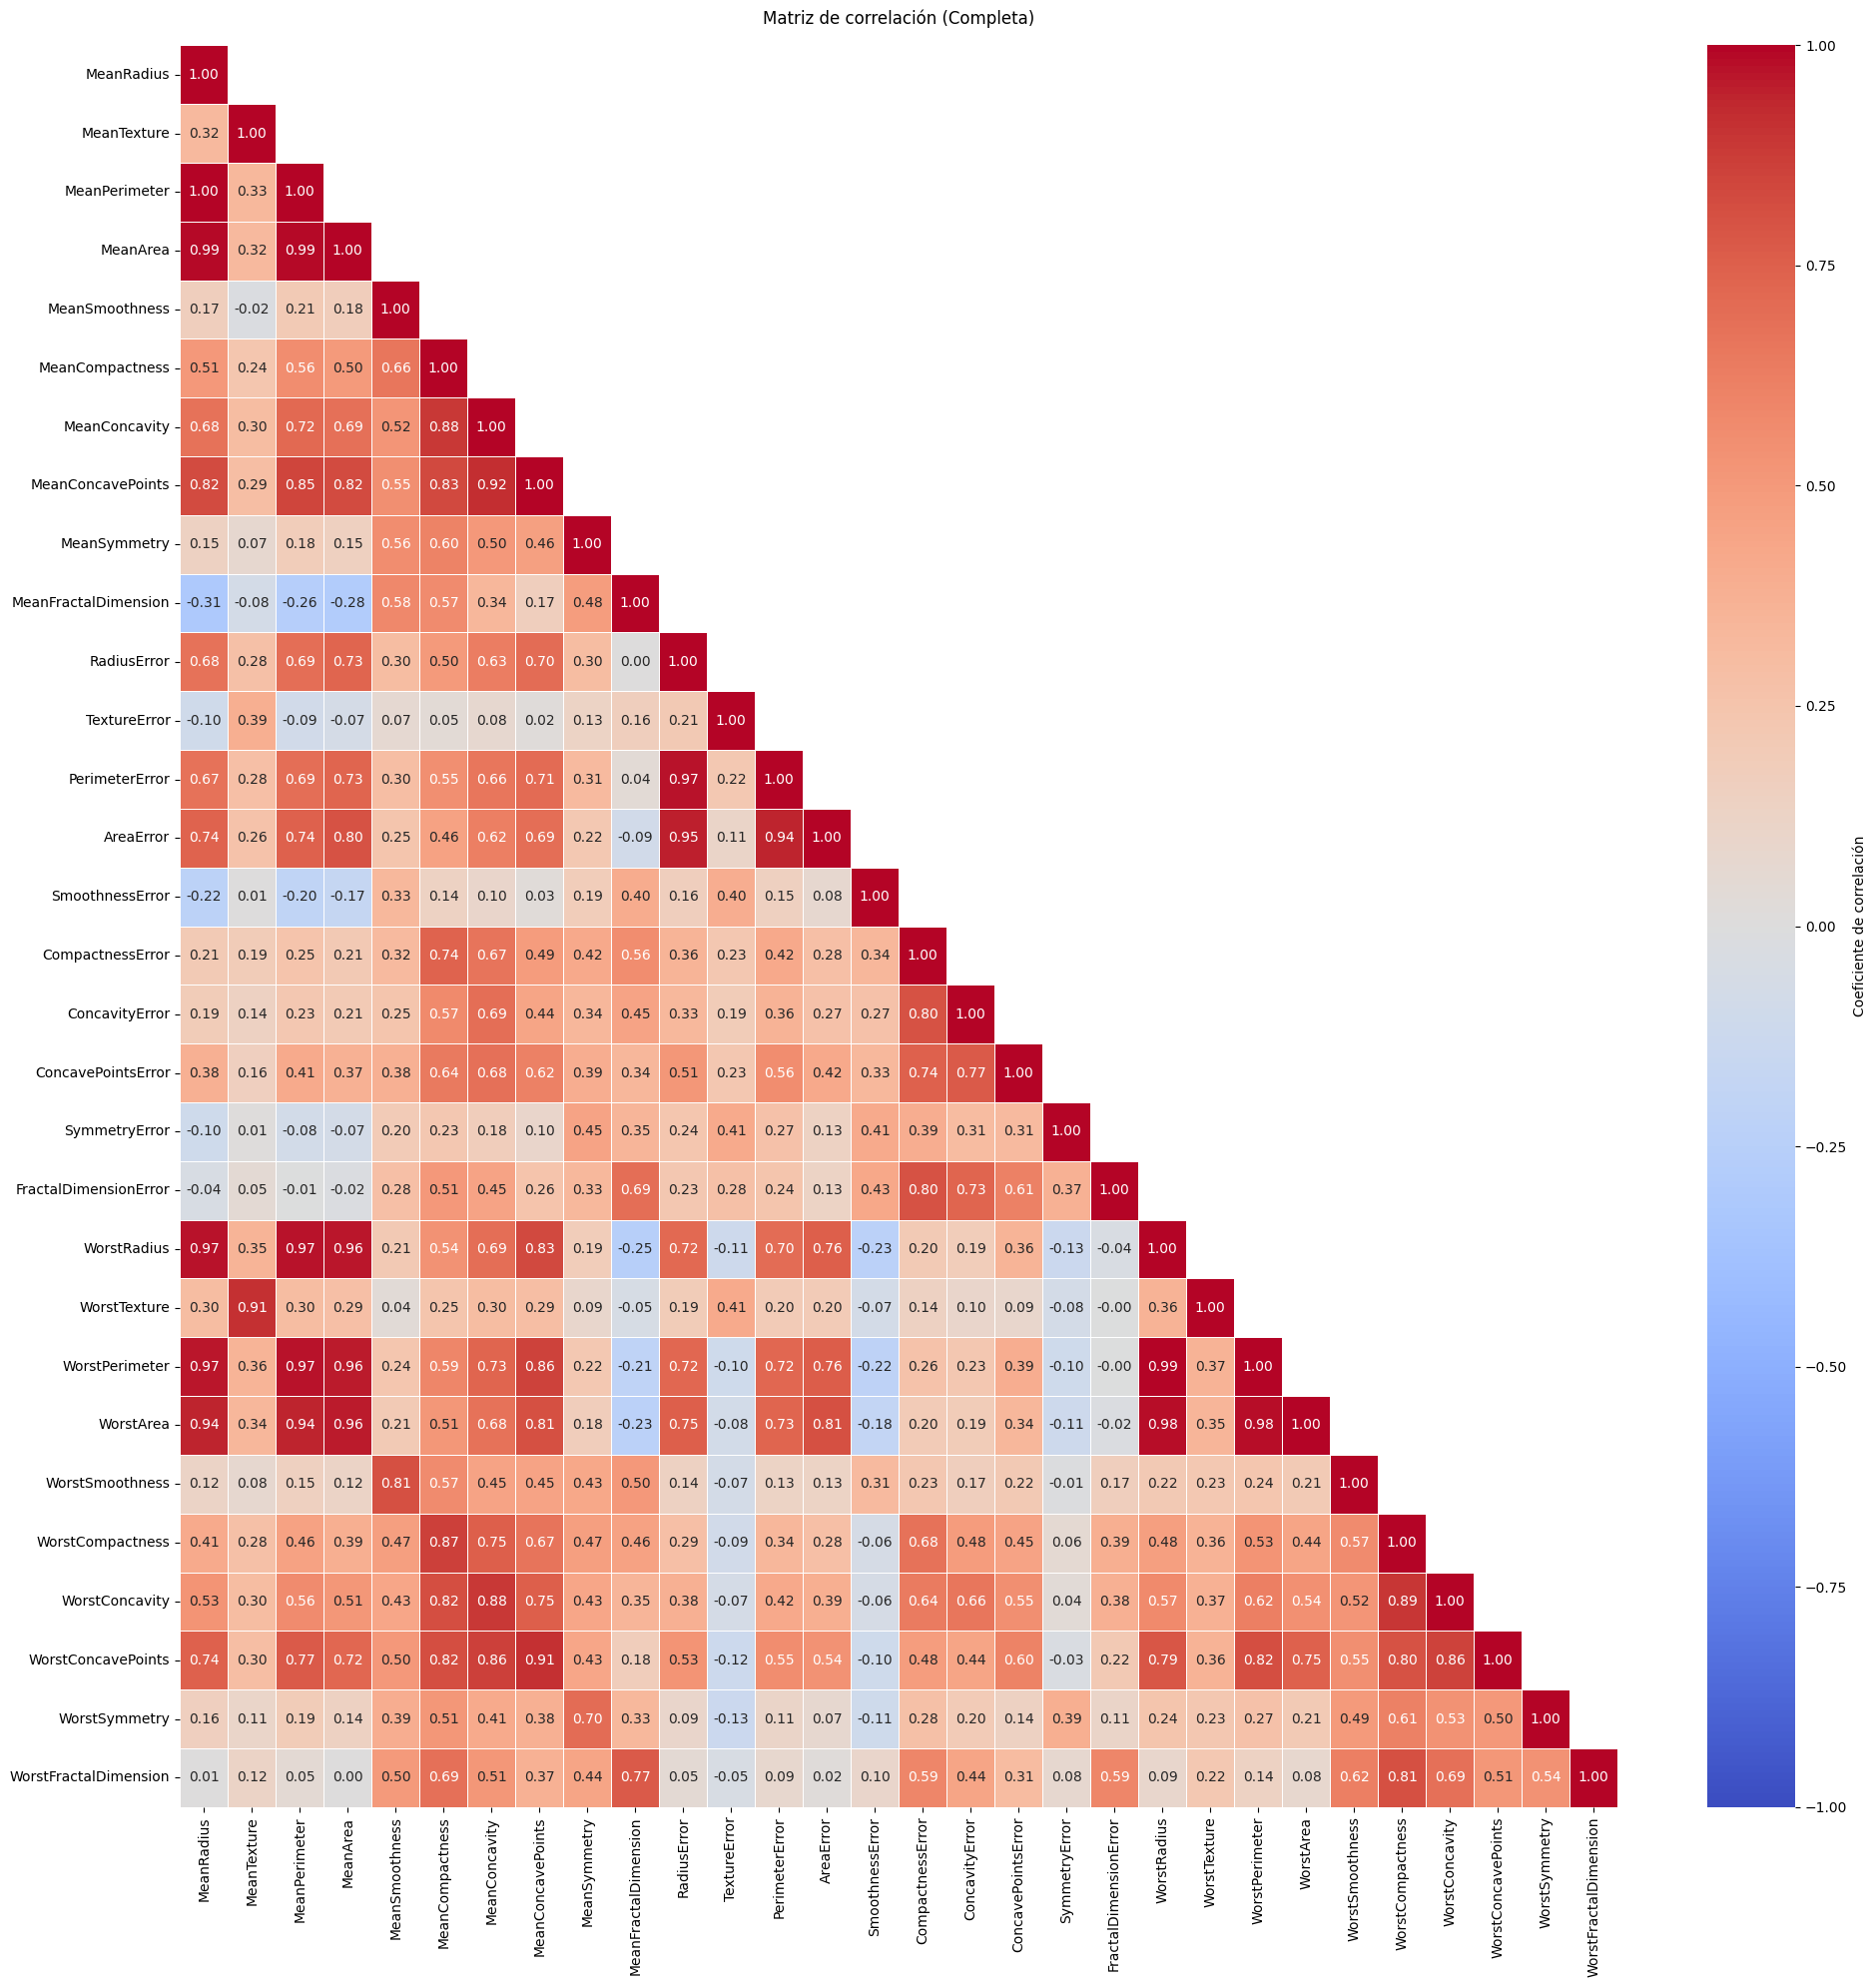

,MeanRadius,MeanTexture,MeanPerimeter,MeanArea,MeanSmoothness,MeanCompactness,MeanConcavity,MeanConcavePoints,MeanSymmetry,MeanFractalDimension,RadiusError,TextureError,PerimeterError,AreaError,SmoothnessError,CompactnessError,ConcavityError,ConcavePointsError,SymmetryError,FractalDimensionError,WorstRadius,WorstTexture,WorstPerimeter,WorstArea,WorstSmoothness,WorstCompactness,WorstConcavity,WorstConcavePoints,WorstSymmetry,WorstFractalDimension
MeanRadius,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.10,0.67,0.74,-0.22,0.21,0.19,0.38,-0.10,-0.04,0.97,0.30,0.96,0.94,0.12,0.41,0.53,0.74,0.16,0.01
MeanTexture,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,0.28,0.39,0.28,0.26,0.01,0.19,0.14,0.16,0.01,0.05,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.29,0.10,0.12
MeanPerimeter,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.09,0.69,0.74,-0.20,0.25,0.23,0.41,-0.08,-0.01,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
MeanArea,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,0.73,-0.07,0.73,0.80,-0.17,0.21,0.21,0.37,-0.07,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
MeanSmoothness,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,0.30,0.07,0.30,0.25,0.33,0.32,0.25,0.38,0.20,0.28,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
MeanCompactness,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.56,0.50,0.05,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
MeanConcavity,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,0.63,0.08,0.66,0.62,0.10,0.67,0.69,0.68,0.18,0.45,0.69,0.30,0.73,0.68,0.45,0.76,0.88,0.86,0.41,0.52
MeanConcavePoints,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,0.70,0.02,0.71,0.69,0.03,0.49,0.44,0.62,0.10,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
MeanSymmetry,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,0.30,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44
MeanFractalDimension,-0.31,-0.08,-0.26,-0.28,0.58,0.56,0.34,0.17,0.48,1.00,0.00,0.16,0.04,-0.09,0.40,0.56,0.45,0.34,0.34,0.69,-0.25,-0.05,-0.20,-0.23,0.51,0.46,0.35,0.17,0.33,0.77


'ℹ️ BREAST CANCER WISCONSIN (DIAGNOSTIC) DATASET - ORIGINAL SIN SPLIT - MATRIZ DE CORRELACIÓN (STRONG)'

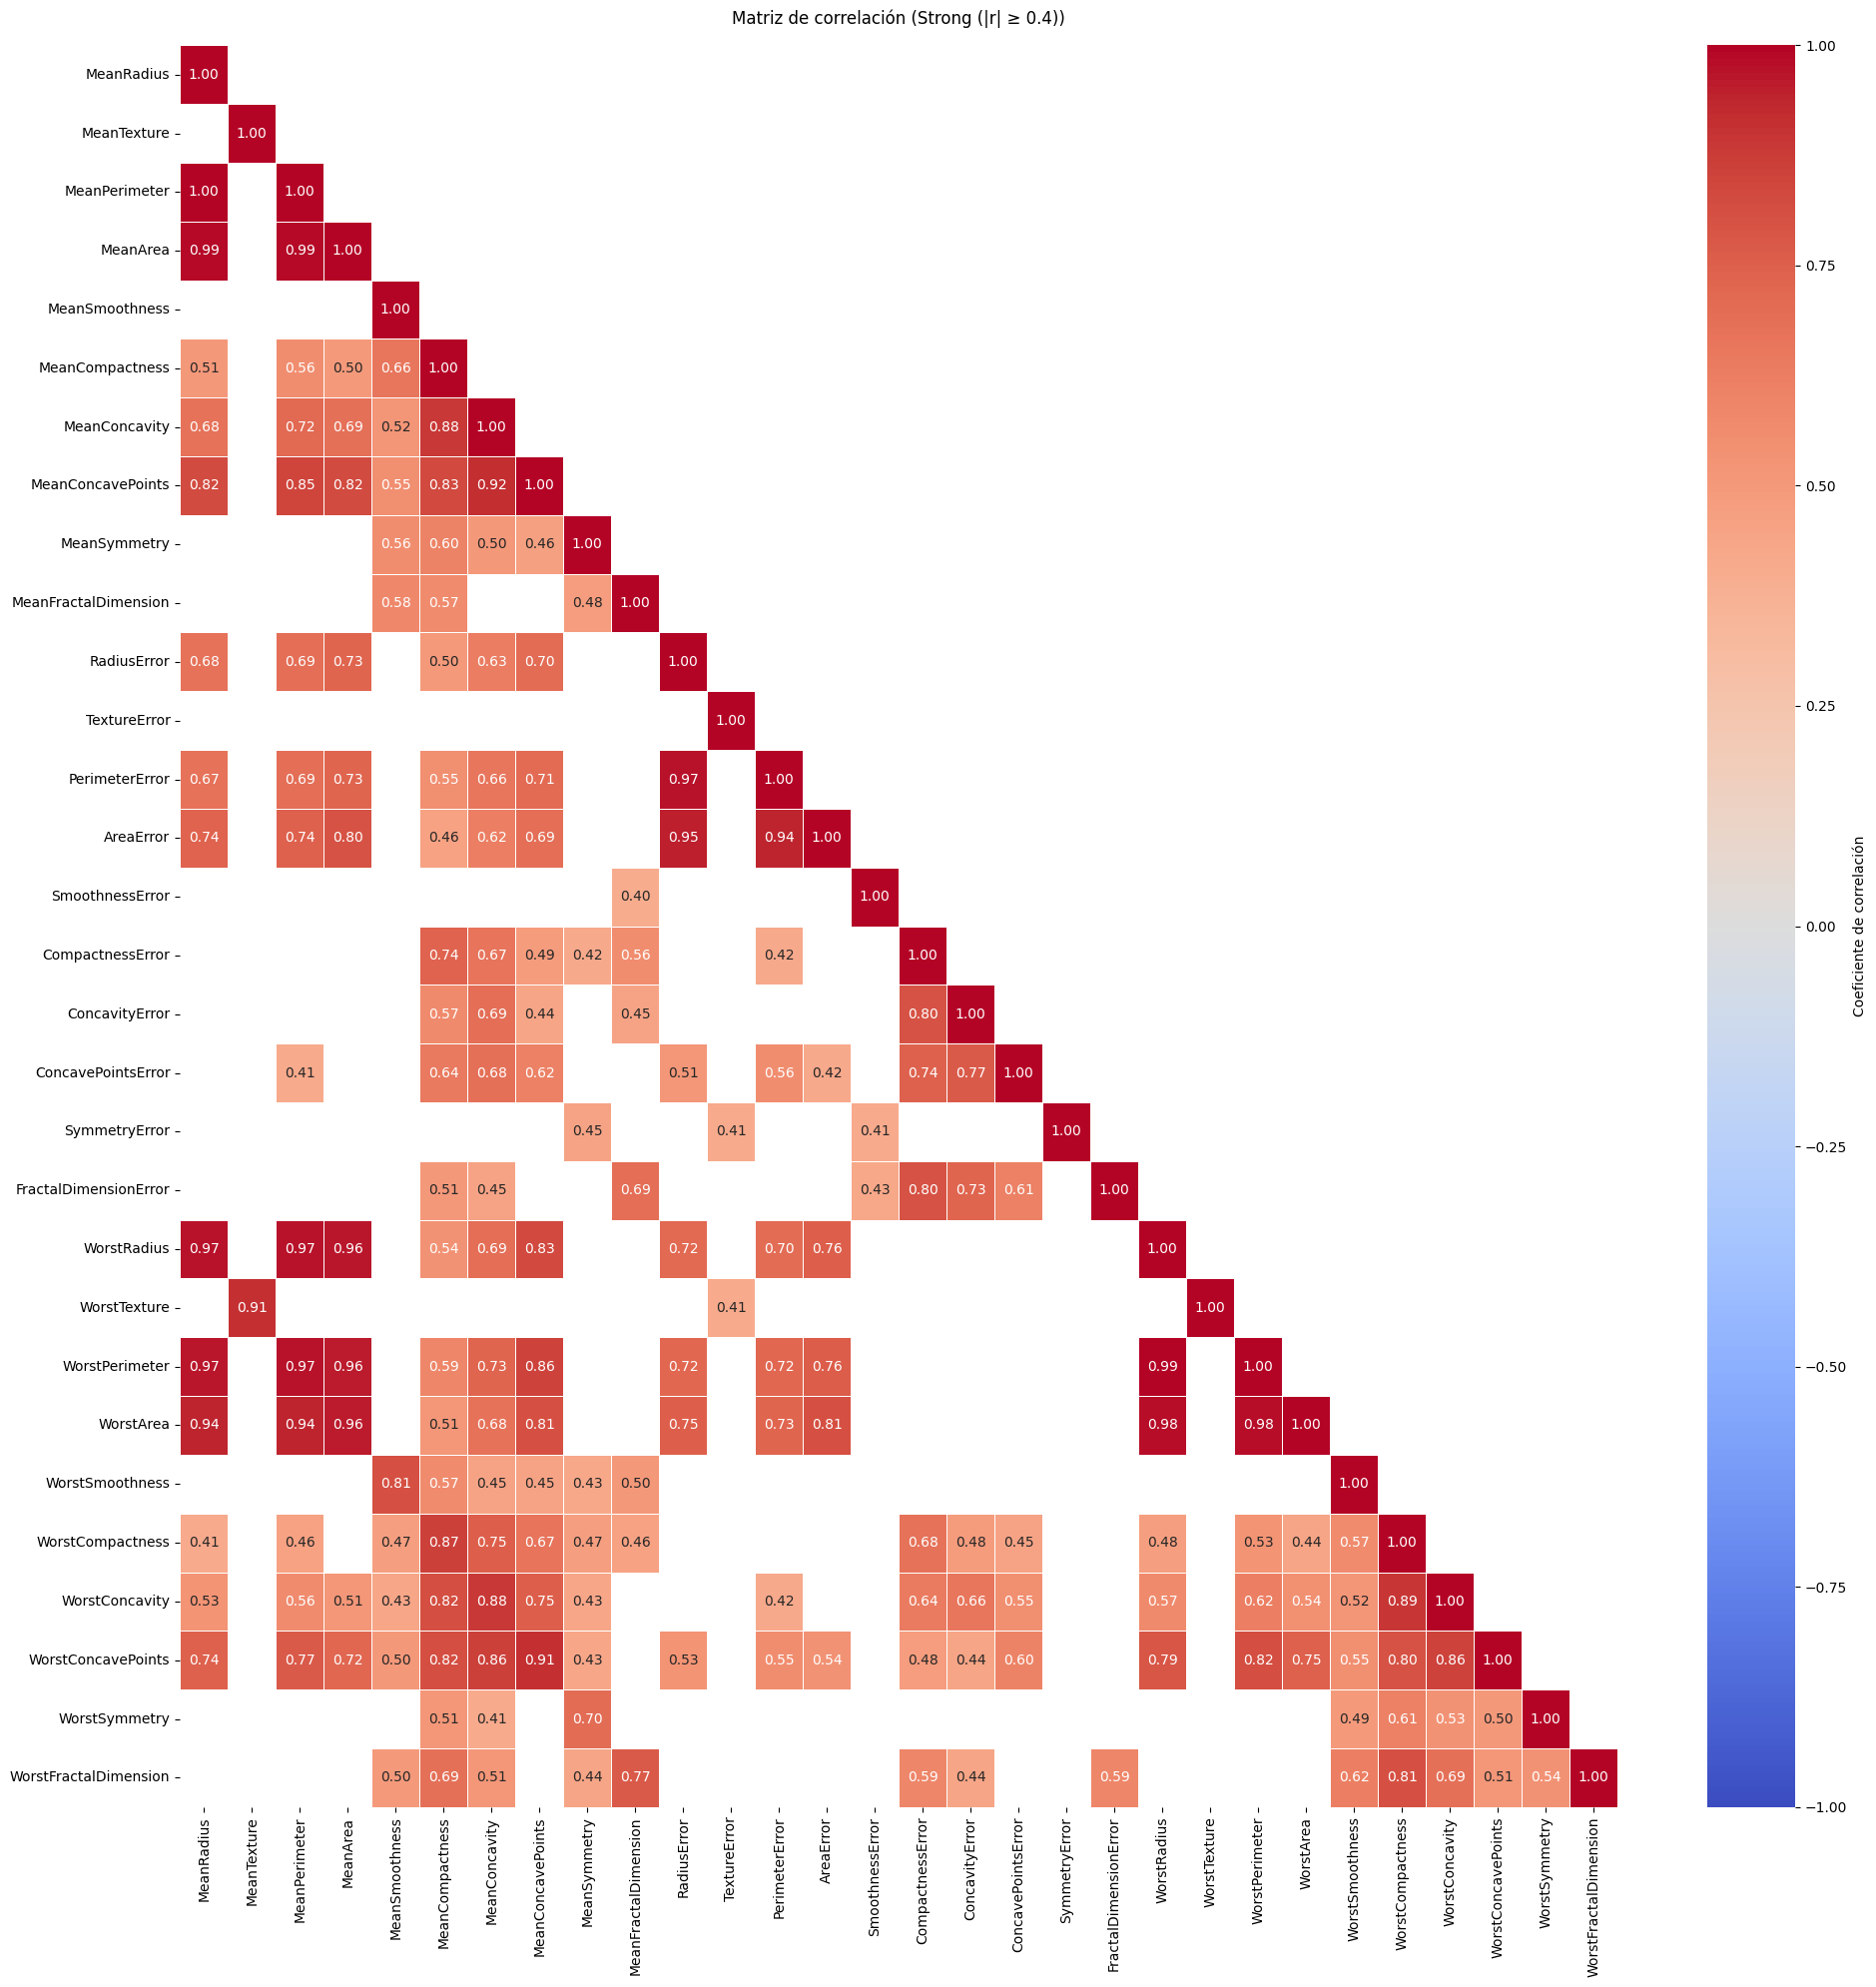

'ℹ️ BREAST CANCER WISCONSIN (DIAGNOSTIC) DATASET - ORIGINAL SIN SPLIT - MATRIZ DE CORRELACIÓN (WEAK)'

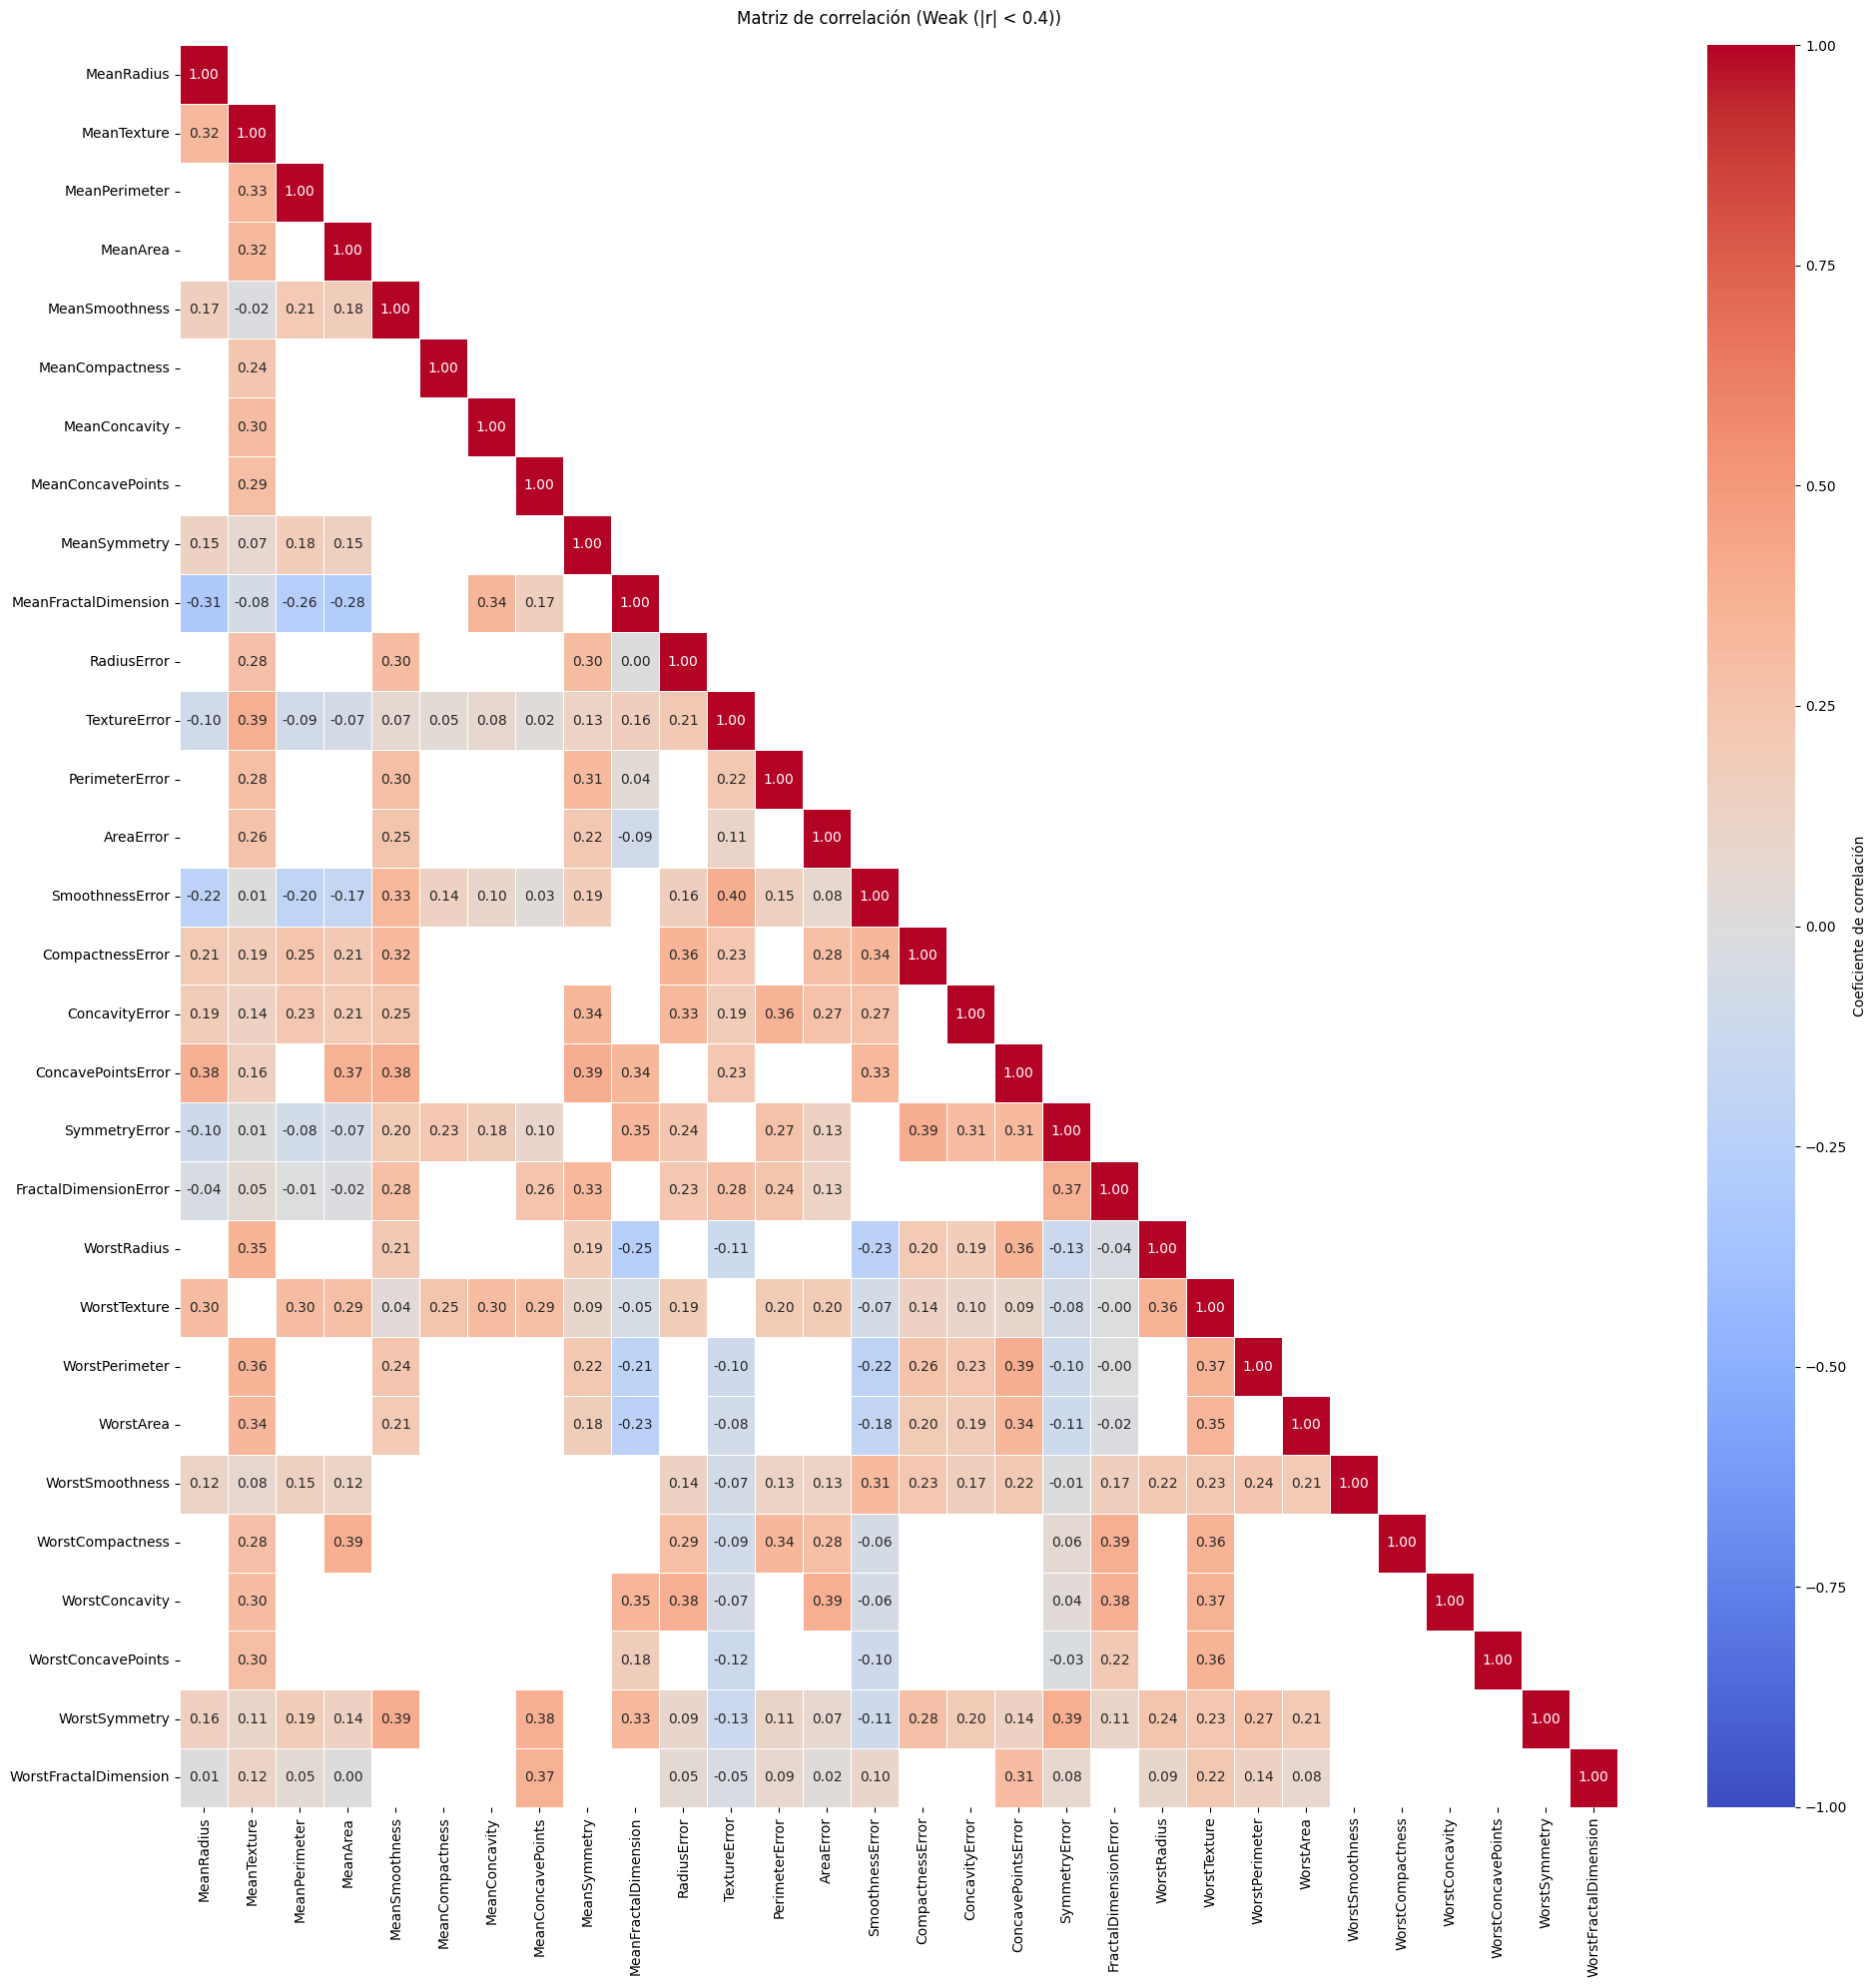

In [13]:

# Carga y preprocesa el dataset de Breast Cancer Wisconsin (Diagnostic).
def LoadBreastCancerDataset(toInclude: list[str] | None = None) -> Dataset:
    bc = cast(Bunch, load_breast_cancer(as_frame=True))
    df: DataFrame = bc.frame.copy()

    TARGET_NAME = "target"

    # Separar X e y
    X = df.drop(columns=[TARGET_NAME]).copy()

    # Normalizar nombres de columnas
    NormalizeColumnNames(X)

    # Filtrar únicamente columnas especificadas en toInclude
    if toInclude is not None and len(toInclude) > 0:
        # Tomar solo columnas existentes
        colsToKeep = [c for c in toInclude if c in X.columns]
        X = X[colsToKeep]

    # Target invertido
    y = 1 - df[[TARGET_NAME]].copy()
    y.columns = ["Diagnosis"]

    return Dataset(X, y)


ShowTitleBox("BREAST CANCER WISCONSIN (DIAGNOSTIC) DATASET", color=ConsoleColor.MAGENTA, boxLineStyle= TitleBoxLineStyle.BLOCK)
ShowTitleBox("CARGANDO EL DATASET", color=ConsoleColor.CYAN, boxLineStyle= TitleBoxLineStyle.SIMPLE)
breastCancerDataset = LoadBreastCancerDataset()

ShowTitleBox("HACIENDO SPLIT AL DATASET", color=ConsoleColor.CYAN, boxLineStyle= TitleBoxLineStyle.SIMPLE)
breastCancerSplit: DatasetSplit = SplitDataset(breastCancerDataset, trainRatio=0.8)
title = "Split del Dataset"
ShowDatasetSplitInfo(breastCancerSplit, title)

ShowTitleBox("HACIENDO ESCALADO AL SPLIT", color=ConsoleColor.CYAN, boxLineStyle= TitleBoxLineStyle.SIMPLE)
breastCancerScaledSplit = ScaleDatasetSplit(breastCancerSplit)
title = "Split escalado"
ShowDatasetSplitHead(breastCancerScaledSplit, title)

ShowTitleBox("MATRIZ DE CORRELACIÓN", color=ConsoleColor.CYAN, boxLineStyle= TitleBoxLineStyle.SIMPLE)
CORR_UMBRAL = 0.4
title = "Breast Cancer Wisconsin (Diagnostic) Dataset - Original sin split"
_ = ShowDfCorrelation(breastCancerDataset.X, title, level=CorrelationType.ALL, showTable=True, figsize=(20,20), annotate=True, umbral=CORR_UMBRAL)
_ = ShowDfCorrelation(breastCancerDataset.X, title, level=CorrelationType.STRONG, showTable=False, figsize=(20,20), annotate=True, umbral=CORR_UMBRAL)
_ = ShowDfCorrelation(breastCancerDataset.X, title, level=CorrelationType.WEAK, showTable=False, figsize=(20,20), annotate=True, umbral=CORR_UMBRAL)



# BREAST CANCER WISCONSIN (DIAGNOSTIC) DATASET 3️⃣ y 4️⃣ Modeling - Evaluating - Aplicación del modelo y evaluación

┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                        CREANDO DATASET SPLITS                                        │
└──────────────────────────────────────────────────────────────────────────────────────────────────────┘
████████████████████████████████████████████████████████████████████████████████████████████████████████
█            EVALUACIÓN DE MODELOS - SPLIT 1 | Type=SCALED | Scaler=Standard | Features=30             █
████████████████████████████████████████████████████████████████████████████████████████████████████████

🔹 LOGISTIC REGRESSION
Accuracy : 0.9649
Precision: 0.9652
Recall   : 0.9649
F1 Score : 0.9647
Confusion Matrix:


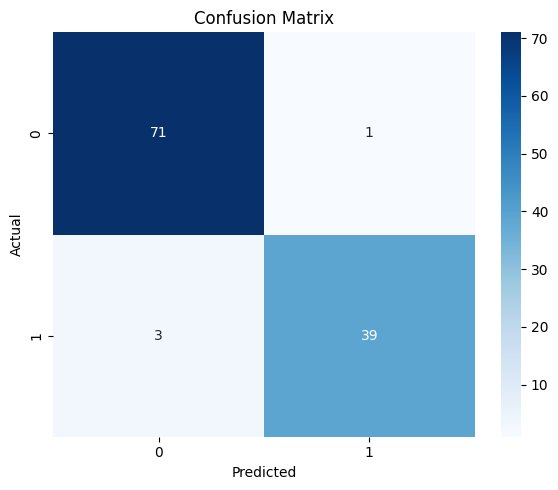

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


🔹 KNN
Best K: 5
Accuracy : 0.9561
Precision: 0.9569
Recall   : 0.9561
F1 Score : 0.9558
Confusion Matrix:


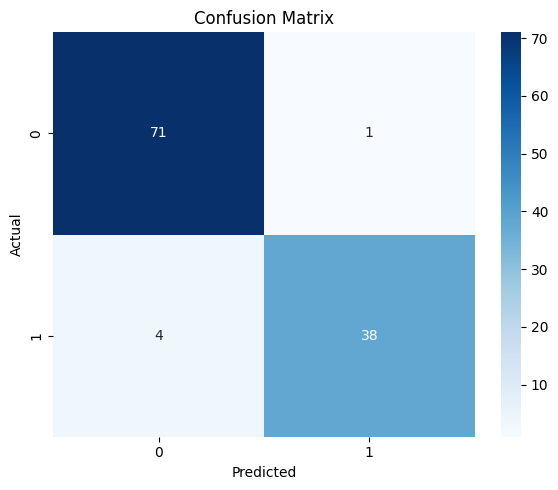

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


🔹 DECISION TREE
Accuracy : 0.9298
Precision: 0.9298
Recall   : 0.9298
F1 Score : 0.9298
Confusion Matrix:


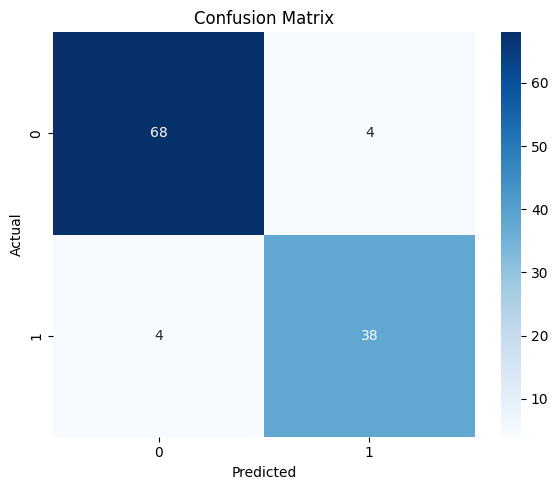

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


🔹 RANDOM FOREST
Accuracy : 0.9737
Precision: 0.9747
Recall   : 0.9737
F1 Score : 0.9735
Confusion Matrix:


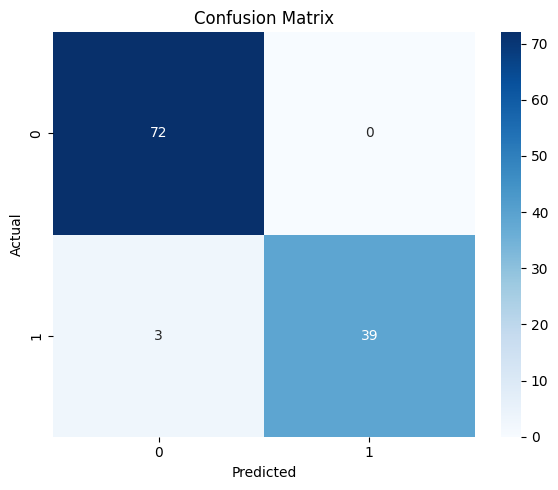

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


🔹 RNA (Red Neuronal Artificial)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Accuracy : 0.9825
Precision: 1.0000
Recall   : 0.9524
F1 Score : 0.9756
Confusion Matrix:


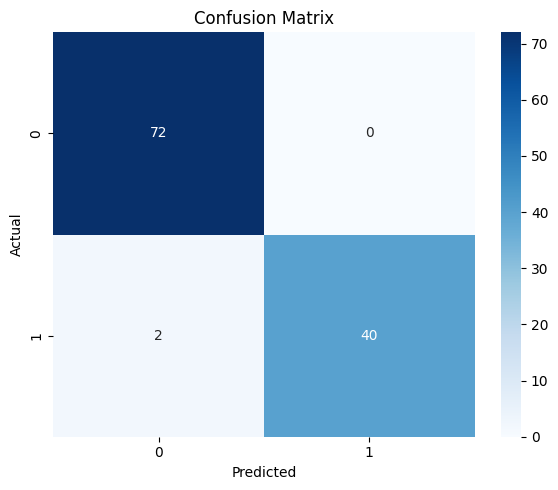

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



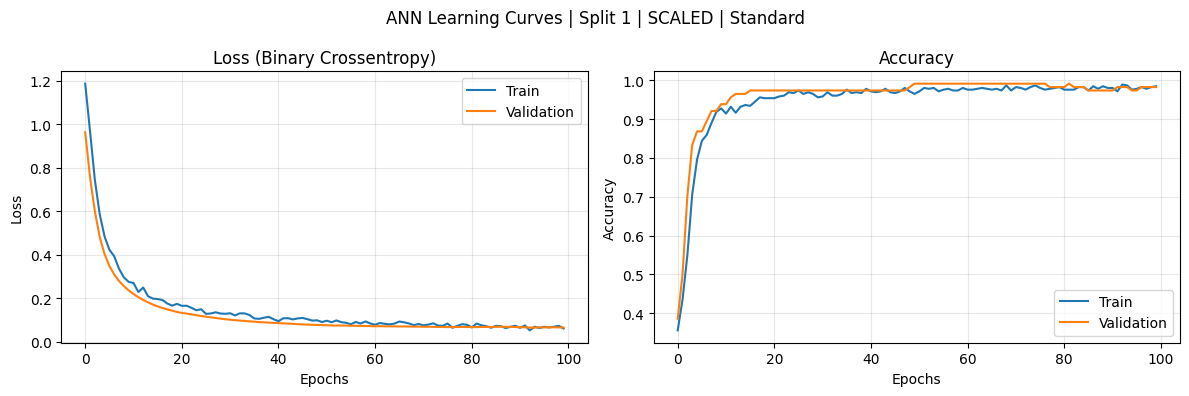

████████████████████████████████████████████████████████████████████████████████████████████████████████
█              EVALUACIÓN DE MODELOS - SPLIT 2 | Type=PCA | Scaler=Standard | Features=10              █
████████████████████████████████████████████████████████████████████████████████████████████████████████

🔹 LOGISTIC REGRESSION
Accuracy : 0.9737
Precision: 0.9747
Recall   : 0.9737
F1 Score : 0.9735
Confusion Matrix:


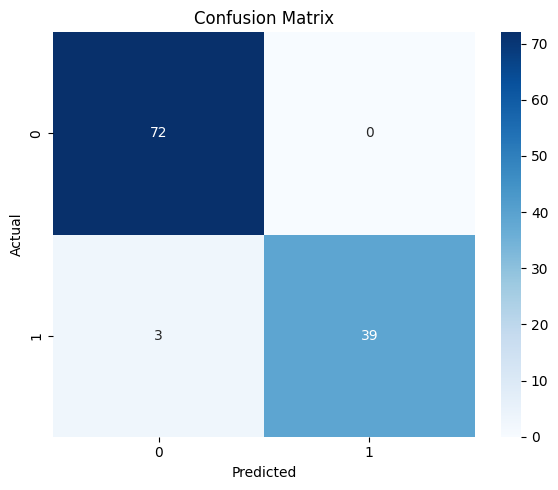

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


🔹 KNN
Best K: 5
Accuracy : 0.9561
Precision: 0.9569
Recall   : 0.9561
F1 Score : 0.9558
Confusion Matrix:


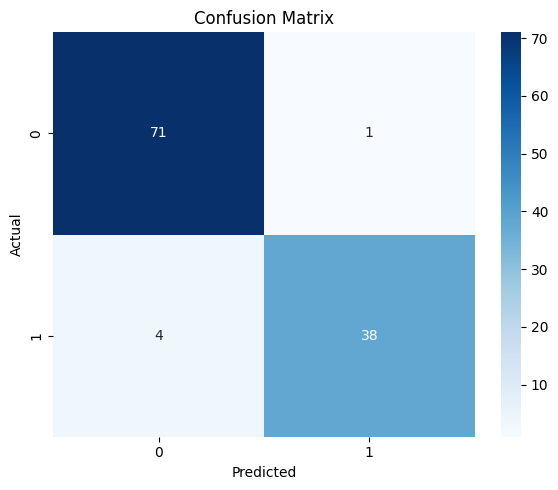

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


🔹 DECISION TREE
Accuracy : 0.9474
Precision: 0.9488
Recall   : 0.9474
F1 Score : 0.9468
Confusion Matrix:


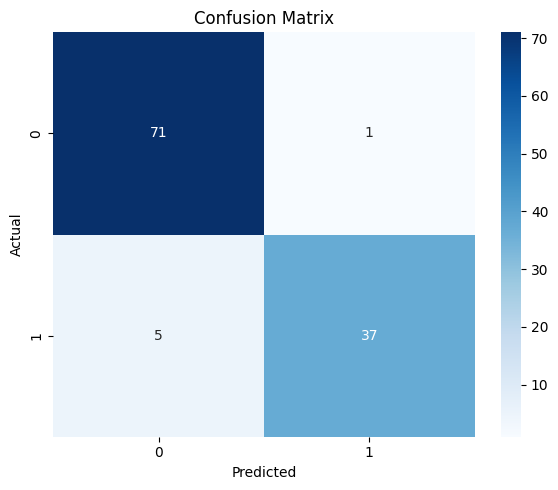

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114


🔹 RANDOM FOREST
Accuracy : 0.9386
Precision: 0.9384
Recall   : 0.9386
F1 Score : 0.9384
Confusion Matrix:


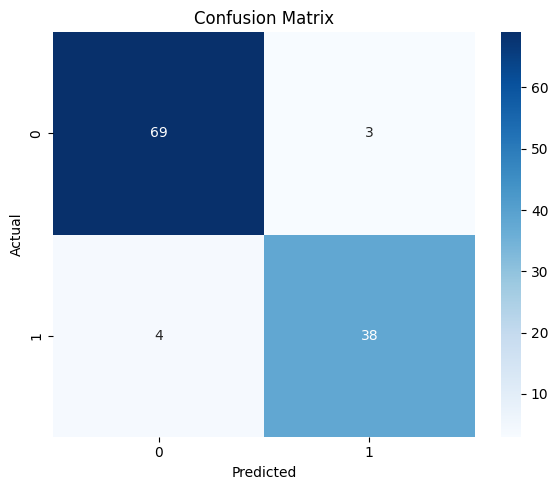

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        72
           1       0.93      0.90      0.92        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


🔹 RNA (Red Neuronal Artificial)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Accuracy : 0.9825
Precision: 1.0000
Recall   : 0.9524
F1 Score : 0.9756
Confusion Matrix:


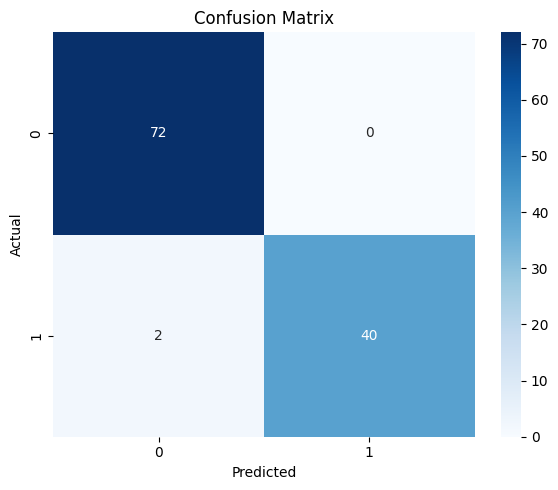

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



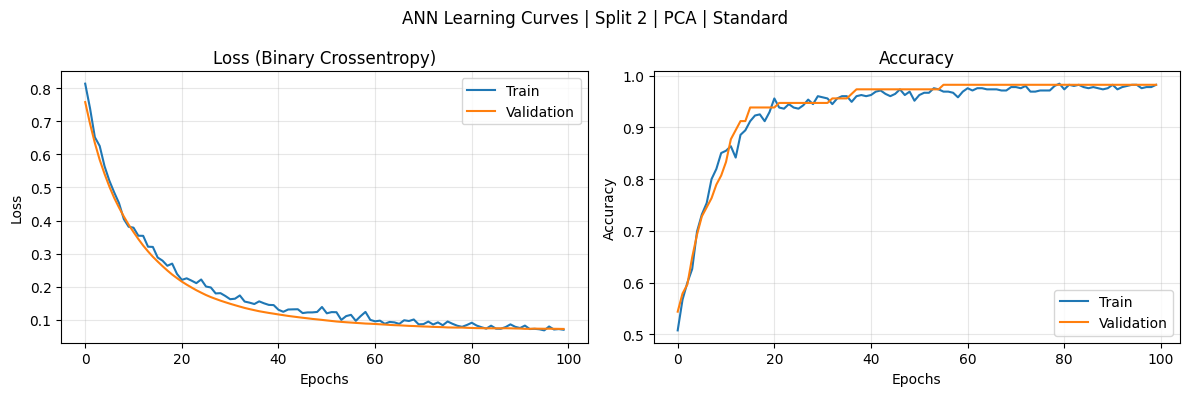

████████████████████████████████████████████████████████████████████████████████████████████████████████
█             EVALUACIÓN DE MODELOS - SPLIT 3 | Type=SCALED | Scaler=minmax | Features=30              █
████████████████████████████████████████████████████████████████████████████████████████████████████████

🔹 LOGISTIC REGRESSION
Accuracy : 0.9737
Precision: 0.9747
Recall   : 0.9737
F1 Score : 0.9735
Confusion Matrix:


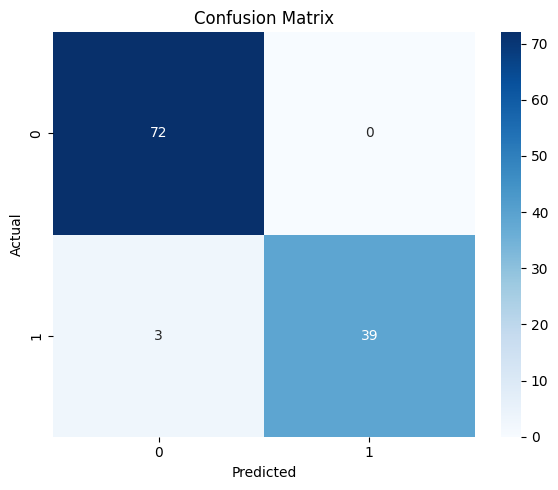

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


🔹 KNN
Best K: 10
Accuracy : 0.9737
Precision: 0.9747
Recall   : 0.9737
F1 Score : 0.9735
Confusion Matrix:


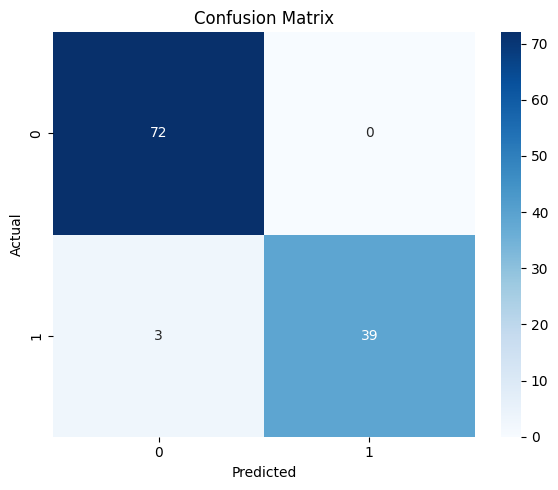

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


🔹 DECISION TREE
Accuracy : 0.9298
Precision: 0.9298
Recall   : 0.9298
F1 Score : 0.9298
Confusion Matrix:


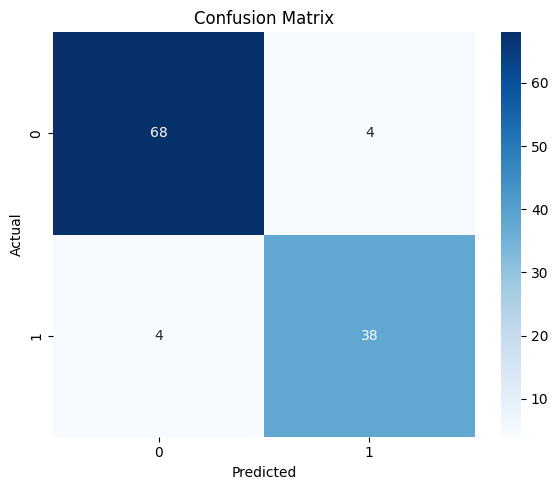

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


🔹 RANDOM FOREST
Accuracy : 0.9737
Precision: 0.9747
Recall   : 0.9737
F1 Score : 0.9735
Confusion Matrix:


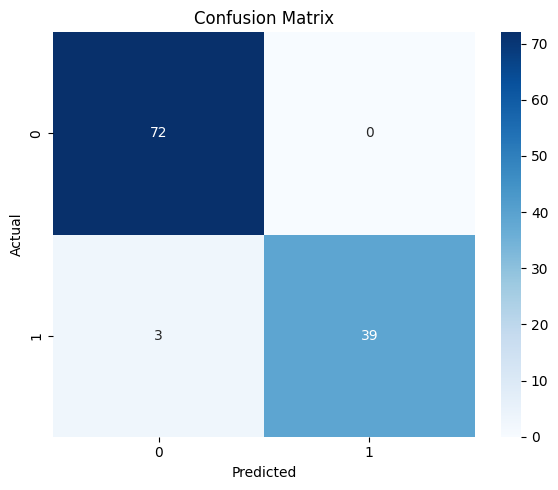

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


🔹 RNA (Red Neuronal Artificial)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Accuracy : 0.9649
Precision: 1.0000
Recall   : 0.9048
F1 Score : 0.9500
Confusion Matrix:


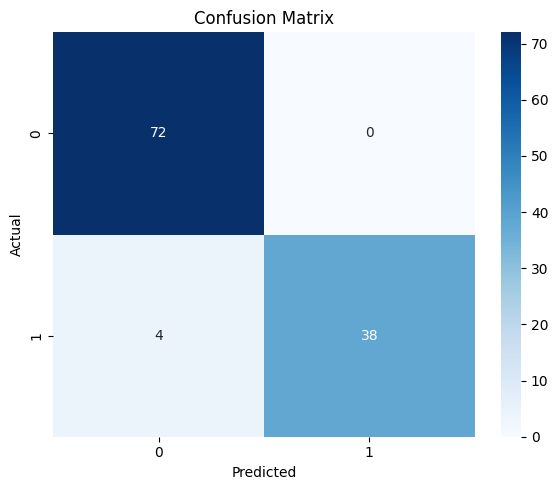

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



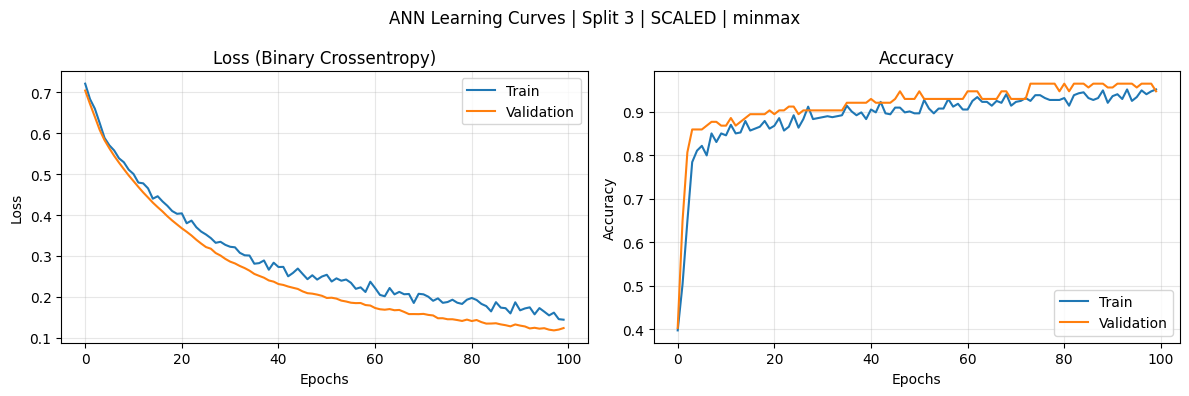

████████████████████████████████████████████████████████████████████████████████████████████████████████
█               EVALUACIÓN DE MODELOS - SPLIT 4 | Type=PCA | Scaler=minmax | Features=10               █
████████████████████████████████████████████████████████████████████████████████████████████████████████

🔹 LOGISTIC REGRESSION
Accuracy : 0.9737
Precision: 0.9747
Recall   : 0.9737
F1 Score : 0.9735
Confusion Matrix:


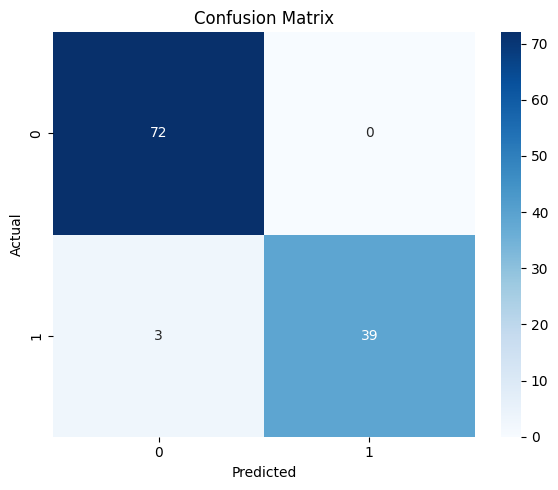

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


🔹 KNN
Best K: 5
Accuracy : 0.9737
Precision: 0.9737
Recall   : 0.9737
F1 Score : 0.9736
Confusion Matrix:


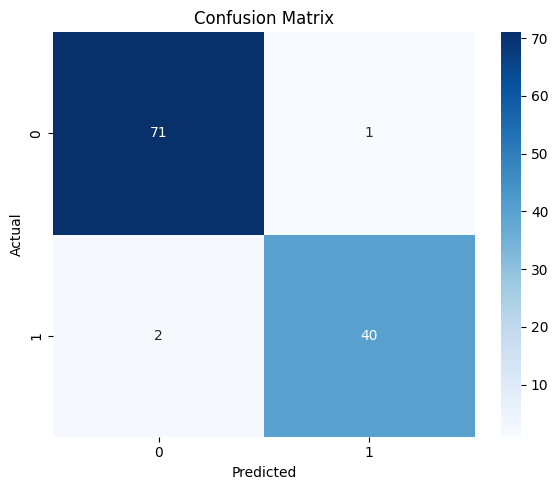

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


🔹 DECISION TREE
Accuracy : 0.9123
Precision: 0.9123
Recall   : 0.9123
F1 Score : 0.9123
Confusion Matrix:


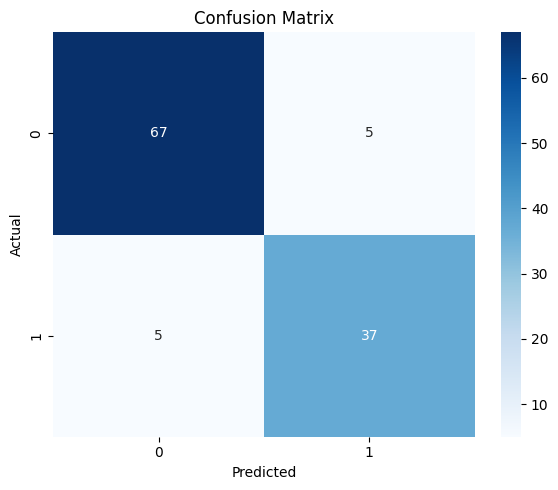

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        72
           1       0.88      0.88      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114


🔹 RANDOM FOREST
Accuracy : 0.9737
Precision: 0.9737
Recall   : 0.9737
F1 Score : 0.9736
Confusion Matrix:


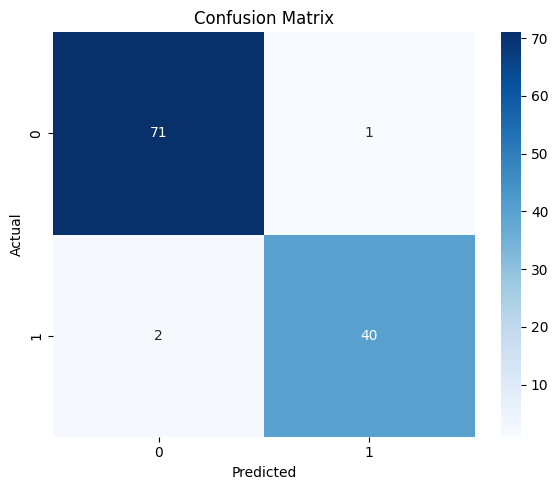

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


🔹 RNA (Red Neuronal Artificial)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy : 0.9825
Precision: 1.0000
Recall   : 0.9524
F1 Score : 0.9756
Confusion Matrix:


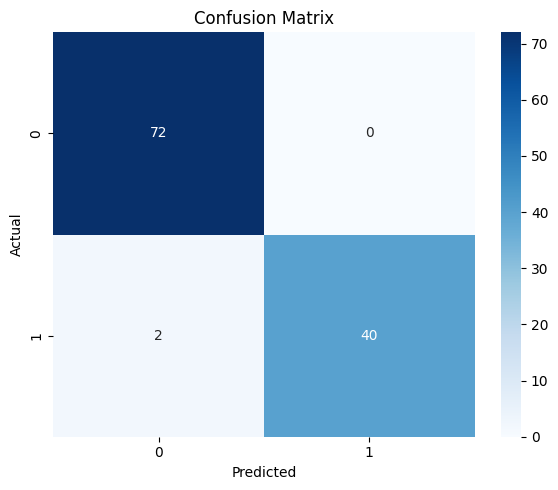

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



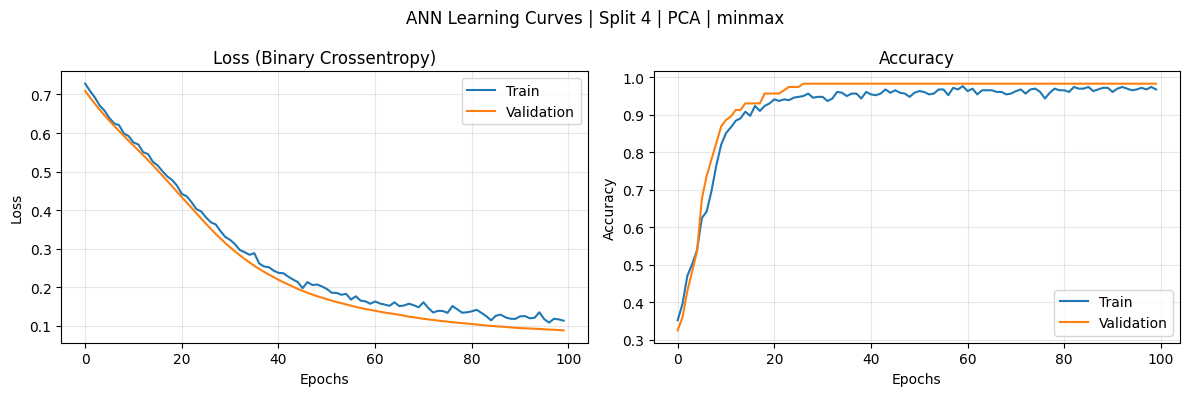

┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                   GENERACIÓN DE TABLA DE MÉTRICAS                                    │
└──────────────────────────────────────────────────────────────────────────────────────────────────────┘
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


,Index,Type,Scaler,LR_Accuracy,LR_F1,KNN_K,KNN_Accuracy,KNN_F1,DT_Accuracy,DT_F1,RF_Accuracy,RF_F1,RNA_Accuracy,RNA_F1
0,1,SCALED,Standard,0.96,0.96,5,0.96,0.96,0.93,0.93,0.97,0.97,0.98,0.98
1,2,PCA,Standard,0.97,0.97,5,0.96,0.96,0.95,0.95,0.94,0.94,0.98,0.98
2,3,SCALED,minmax,0.97,0.97,10,0.97,0.97,0.93,0.93,0.97,0.97,0.96,0.94
3,4,PCA,minmax,0.97,0.97,5,0.97,0.97,0.91,0.91,0.97,0.97,0.98,0.98


┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                GRÁFICA DE ACCURACY POR SPLIT Y MODELO                                │
└──────────────────────────────────────────────────────────────────────────────────────────────────────┘


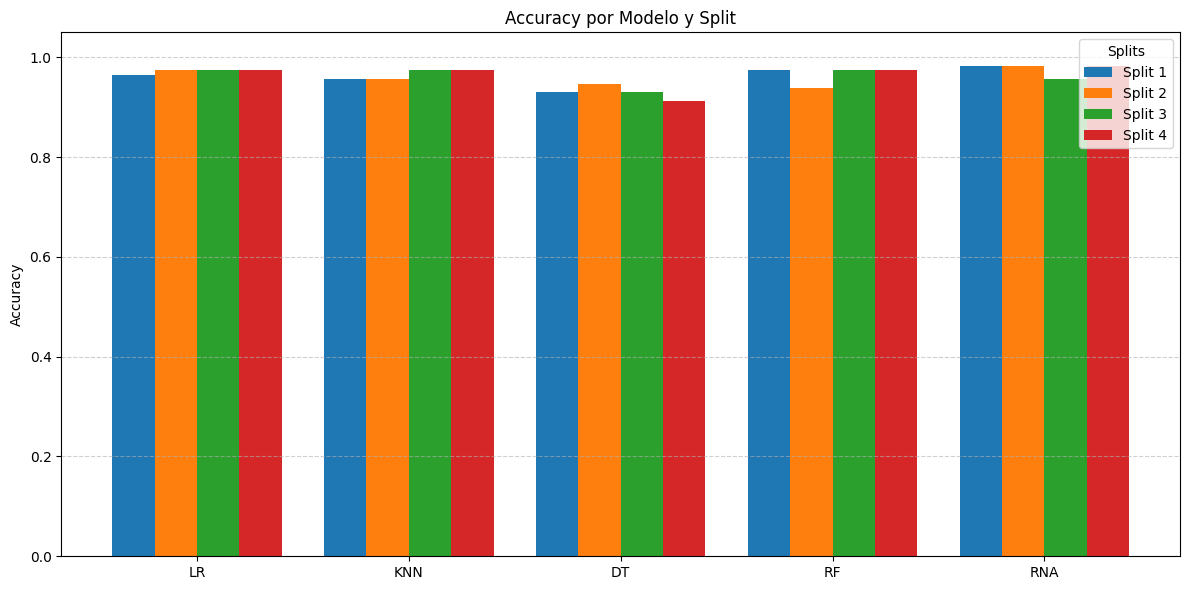

In [14]:
ShowTitleBox(
    "CREANDO DATASET SPLITS",
    color=ConsoleColor.CYAN,
    boxLineStyle=TitleBoxLineStyle.SIMPLE,
)
splitEscaled = ScaleDatasetSplit(SplitDataset(LoadBreastCancerDataset()))
splitWithPCA = ApplyPCA(ScaleDatasetSplit(SplitDataset(LoadBreastCancerDataset())))
splitEscaledMinMax = ScaleDatasetSplit(
    SplitDataset(LoadBreastCancerDataset()), scaler=CreateScaler(ScalerType.MIN_MAX)
)
splitWithPCAMinMax = ApplyPCA(
    ScaleDatasetSplit(
        SplitDataset(LoadBreastCancerDataset()), scaler=CreateScaler(ScalerType.MIN_MAX)
    )
)
allSplits = [splitEscaled, splitWithPCA, splitEscaledMinMax, splitWithPCAMinMax]


EvaluateDatasetSplits(
    splitList=allSplits,
    targetColumn="Diagnosis",
    includeRNA=True,
    showConfusionMatrix=True,
)

ShowTitleBox(
    "GENERACIÓN DE TABLA DE MÉTRICAS",
    color=ConsoleColor.CYAN,
    boxLineStyle=TitleBoxLineStyle.SIMPLE,
)
dfMetrics = GenerateMetricsTable(allSplits, targetColumn="Diagnosis", includeRNA=True)
display(dfMetrics)

ShowTitleBox(
    "GRÁFICA DE ACCURACY POR SPLIT Y MODELO",
    color=ConsoleColor.CYAN,
    boxLineStyle=TitleBoxLineStyle.SIMPLE,
)
PlotAccuracyBySplit(dfMetrics)

# 🏁 Resultados 🏁

Se tiene 4 datasets para probar:

- Dataset original escalado con StandardScaler.
- Dataset escalado con Standard Scaler y aplicado PCA.
- Dataset original escalado con MinMaxScaler.
- Dataset escalado con MinMax Scaler y aplicado PCA.


Aplicamos cada uno de los modelos y generamos la tabla de métricas. Con la tabla de métricas mostramos un gráfico de barras con las accuracy de cada modelo por cada DatasetSplit.

Para este dataset el modelo ganador indiscutible es la RNA logrando la mejor puntuación utilizando los datos escalados y con PCA usando Standard Scaler.

LR es el modelo más estable ya que no se ve afectado por el scaler o PCA.

Todos los modelos tienen un rendimiento excelente a excepción de DT que llega a tener una puntuación de 0.91 en accuracy por lo que no es muy fiable utilizar este modelo.

En resumen podemos armar un ranking por modelo.

| Modelo | Accuracy media |
| ------ | -------------- |
| 🥇 RNA | **0.9725**     |
| 🥈 RF  | 0.9625         |
| 🥉 LR  | 0.9675         |
| KNN    | 0.9650         |
| DT     | **0.9300**     |




 